In [1]:
import scanpy as sc
import pandas as pd
import os

# Load and Inspect Your Data
# Extract the files:

Extract the GSM7837932_Normal.tar and GSM7837933_Tumor.tar files to obtain the .mtx, .tsv, or other formats inside (typically the matrix, barcodes, and features files).
Load the data into AnnData objects:

Use scanpy to load the matrix data:

In [2]:
import scanpy as sc

# Define paths
normal_path = "E:/Projects/CADD/Single cell Analysis/Normal"
tumor_path = "E:/Projects/CADD/Single cell Analysis/Tumor"

# Load the data
adata_normal = sc.read_10x_mtx(normal_path, var_names='gene_symbols', cache=True)
adata_tumor = sc.read_10x_mtx(tumor_path, var_names='gene_symbols', cache=True)

# Inspect the data
print("Normal Sample:", adata_normal)
print("Tumor Sample:", adata_tumor)



C:\Users\MSI\anaconda3\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Normal Sample: AnnData object with n_obs × n_vars = 5585 × 36601
    var: 'gene_ids', 'feature_types'
Tumor Sample: AnnData object with n_obs × n_vars = 16325 × 36601
    var: 'gene_ids', 'feature_types'


In [3]:
adata_tumor.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGAAAGCGA-1, AAACCCAAGAAGCCAC-1, AAACCCAAGGGTGAAA-1, AAACCCACACCTGAAT-1, AAACCCACAGTGTGGA-1, AAACCCAGTACCGGCT-1, AAACCCATCAAATGAG-1, AAACCCATCAACTCTT-1, AAACCCATCAGGAAAT-1, AAACCCATCCCAAGCG-1, AAACGAAAGCCTGAGA-1, AAACGAAAGTCATTGC-1, AAACGAAAGTGTACCT-1, AAACGAACAAATACAG-1, AAACGAACACAAGTGG-1, AAACGAACACGGGCTT-1, AAACGAACAGACTGCC-1, AAACGAACATGATCTG-1, AAACGAACATTCATCT-1, AAACGAAGTAACTGCT-1, AAACGAAGTCCCTCAT-1, AAACGAAGTTGTCTAG-1, AAACGAATCCGAGCTG-1, AAACGAATCCGGTTCT-1, AAACGCTAGAGTTCGG-1, AAACGCTAGCATCGAG-1, AAACGCTAGGAAGAAC-1, AAACGCTAGGTTACAA-1, AAACGCTAGTCATGAA-1, AAACGCTCAAGGTCAG-1, AAACGCTCAATGTGGG-1, AAACGCTCAGCGCTTG-1, AAACGCTCAGGGACTA-1, AAACGCTCATCTCAAG-1, AAACGCTGTACGCTAT-1, AAACGCTGTAGACACG-1, AAACGCTGTGAACCGA-1, AAACGCTGTGATACCT-1, AAACGCTTCATGGAGG-1, AAACGCTTCCGCTAGG-1, AAACGCTTCCTTCTAA-1, AAACGCTTCTCGGTCT-1, AAACGCTTCTCTAAGG-1, AAACGCTTCTGCCCTA-1, AAAGAACAGACCAGAC-1, AAAGAACAGTCACGCC-1, AAAGAACCAATTTCCT-1, AAAGAACCATCCGAAT-1, AAAGAACGTAAGGCCA-1, AAAGAACGTACCCGCA-1, AAAGAACGTCTCCCTA-1, AAAGAACGTCTGTCAA-1, AAAGAACGTGCGACAA-1, AAAGAACGTGTCTCCT-1, AAAGAACGTTAATGAG-1, AAAGAACTCGTAGGGA-1, AAAGGATAGATCGCTT-1, AAAGGATCACCTGCAG-1, AAAGGATCAGAAGTGC-1, AAAGGATCAGACCAAG-1, AAAGGATCAGATACCT-1, AAAGGATCATATCTGG-1, AAAGGATCATGCCATA-1, AAAGGATCATTGCCGG-1, AAAGGATGTCACAATC-1, AAAGGATTCCAAGCTA-1, AAAGGATTCGGAGTAG-1, AAAGGATTCGTTAGAC-1, AAAGGATTCTCAAAGC-1, AAAGGGCAGCCAAGGT-1, AAAGGGCCAACTCATG-1, AAAGGGCCACTCTGCT-1, AAAGGGCCAGAACTCT-1, AAAGGGCGTAACGTTC-1, AAAGGGCGTATCGTGT-1, AAAGGGCGTCGGTGTC-1, AAAGGGCTCATTATCC-1, AAAGGGCTCATTGAGC-1, AAAGGGCTCGATTTCT-1, AAAGGGCTCGTGGAAG-1, AAAGGTAAGAGCATAT-1, AAAGGTAAGATTGAGT-1, AAAGGTAAGTAACAGT-1, AAAGGTACACACCTGG-1, AAAGGTACACATACTG-1, AAAGGTACACCGGCTA-1, AAAGGTACATAACGGG-1, AAAGGTACATCATTGG-1, AAAGGTAGTATGATCC-1, AAAGGTAGTCCTGGGT-1, AAAGGTAGTCGGTGAA-1, AAAGGTAGTTGCCGAC-1, AAAGGTATCGCATAGT-1, AAAGGTATCGTGGCTG-1, AAAGGTATCTGGTGGC-1, AAAGTCCCAATGGGTG-1, AAAGTCCCACTAGGCC-1, AAAGTCCCAGCGCTTG-1, AAAGTCCCATCGTCCT-1, AAAGTCCCATGAATAG-1, ...]

[16325 rows x 0 columns]

# Step 3: Preprocessing
Quality Control (QC):

Calculate metrics for filtering cells:

Calculate Mitochondrial Gene Percentage
Identify Mitochondrial Genes
Ensure your dataset's gene names are annotated correctly. Mitochondrial genes typically start with "MT-" in human datasets.

Calculate pct_counts_mt Manually Use the mitochondrial gene list to calculate the percentage of counts coming from mitochondrial genes.

Here’s how to fix and adapt the code:

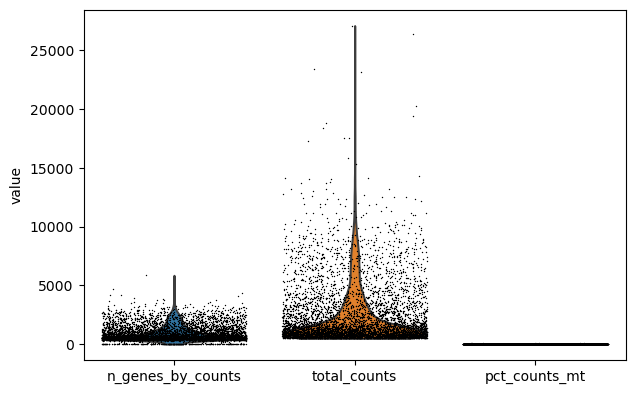

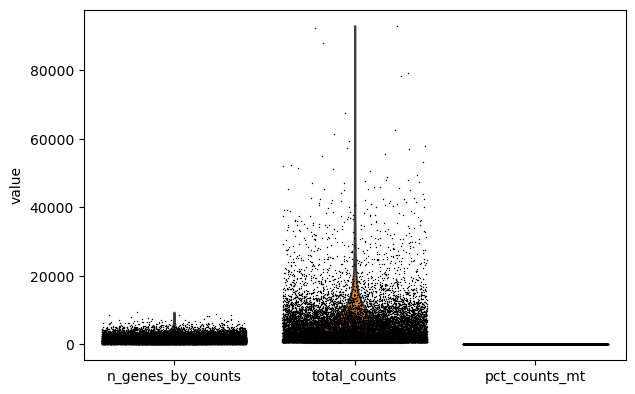

In [4]:
# Add mitochondrial gene percentage calculation
mito_genes = adata_normal.var_names.str.startswith('MT-')  # For human datasets

# If mitochondrial genes are identified:
if mito_genes.any():
    adata_normal.obs['pct_counts_mt'] = (
        adata_normal[:, mito_genes].X.sum(axis=1) / adata_normal.X.sum(axis=1)
    ) * 100
    adata_tumor.obs['pct_counts_mt'] = (
        adata_tumor[:, mito_genes].X.sum(axis=1) / adata_tumor.X.sum(axis=1)
    ) * 100
else:
    print("No mitochondrial genes detected. Skipping `pct_counts_mt` calculation.")

# Quality control for Normal sample
sc.pp.calculate_qc_metrics(adata_normal, inplace=True)
sc.pl.violin(adata_normal, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)
adata_normal = adata_normal[adata_normal.obs['pct_counts_mt'] < 10]
adata_normal = adata_normal[adata_normal.obs['n_genes_by_counts'] > 200]

# Quality control for Tumor sample
sc.pp.calculate_qc_metrics(adata_tumor, inplace=True)
sc.pl.violin(adata_tumor, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)
adata_tumor = adata_tumor[adata_tumor.obs['pct_counts_mt'] < 10]
adata_tumor = adata_tumor[adata_tumor.obs['n_genes_by_counts'] > 200]




# Compute Neighbors

In [8]:
# Normalize and preprocess the data (if not done already)
sc.pp.normalize_total(adata_normal, target_sum=1e4)
sc.pp.log1p(adata_normal)
sc.pp.highly_variable_genes(adata_normal, n_top_genes=2000)
adata_normal = adata_normal[:, adata_normal.var.highly_variable]

sc.pp.normalize_total(adata_tumor, target_sum=1e4)
sc.pp.log1p(adata_tumor)
sc.pp.highly_variable_genes(adata_tumor, n_top_genes=2000)
adata_tumor = adata_tumor[:, adata_tumor.var.highly_variable]

# Perform PCA
sc.tl.pca(adata_normal)
sc.tl.pca(adata_tumor)

# Compute neighbors
sc.pp.neighbors(adata_normal, n_neighbors=10, n_pcs=40)
sc.pp.neighbors(adata_tumor, n_neighbors=10, n_pcs=40)



C:\Users\MSI\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\preprocessing\_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


# Perform Leiden clustering

In [9]:
# Perform Leiden clustering
sc.tl.leiden(adata_normal, resolution=0.5)
sc.tl.leiden(adata_tumor, resolution=0.5)


# Verify Clustering

In [10]:
print(adata_normal.obs['leiden'].unique())
print(adata_tumor.obs['leiden'].unique())


['18', '9', '3', '1', '11', ..., '16', '8', '17', '13', '15']
Length: 19
Categories (19, object): ['0', '1', '2', '3', ..., '15', '16', '17', '18']
['3', '2', '1', '8', '0', ..., '10', '11', '18', '19', '17']
Length: 20
Categories (20, object): ['0', '1', '2', '3', ..., '16', '17', '18', '19']


In [18]:
# Compute neighbors if not already done
sc.pp.neighbors(adata_normal, n_neighbors=10, n_pcs=40)
sc.pp.neighbors(adata_tumor, n_neighbors=10, n_pcs=40)

# Compute UMAP
sc.tl.umap(adata_normal)
sc.tl.umap(adata_tumor)

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


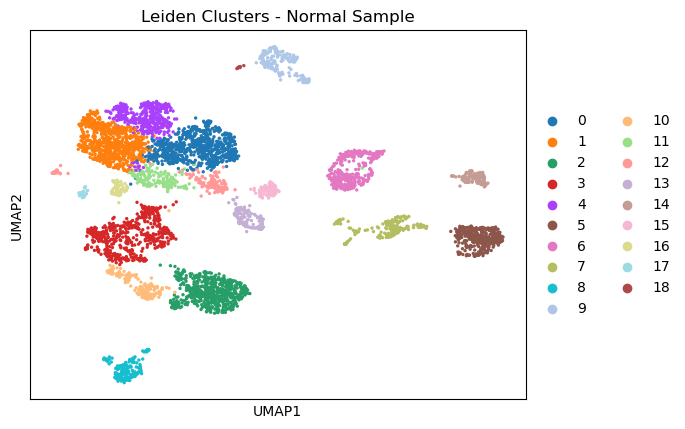

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


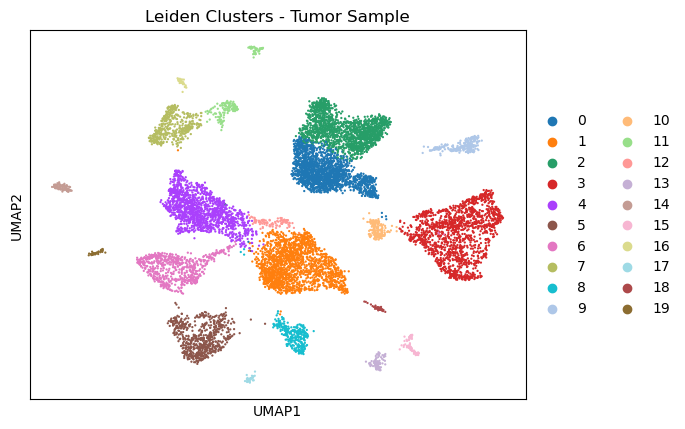

In [19]:
# Visualize Leiden clusters for Normal sample
sc.pl.umap(adata_normal, color='leiden', title='Leiden Clusters - Normal Sample')

# Visualize Leiden clusters for Tumor sample
sc.pl.umap(adata_tumor, color='leiden', title='Leiden Clusters - Tumor Sample')


In [ ]:
# Annotate clusters manually (example)
adata_normal.obs['cluster_labels'] = adata_normal.obs['leiden'].map({
    '0': 'Cell Type A',
    '1': 'Cell Type B',
    '2': 'Cell Type C'
})

# Plot annotated clusters
sc.pl.umap(adata_normal, color='cluster_labels', title='Annotated Clusters - Normal Sample')


# Proceed with Differential Expression Analysis

In [11]:
# Differential expression analysis
sc.tl.rank_genes_groups(adata_normal, 'leiden', method='wilcoxon')
sc.tl.rank_genes_groups(adata_tumor, 'leiden', method='wilcoxon')

# Create DataFrames
normal_result = sc.get.rank_genes_groups_df(adata_normal, group=None)
tumor_result = sc.get.rank_genes_groups_df(adata_tumor, group=None)

# Save to CSV
normal_result.to_csv("normal_differential_expression.csv", index=False)
tumor_result.to_csv("tumor_differential_expression.csv", index=False)


 # Ranked Genes Plot

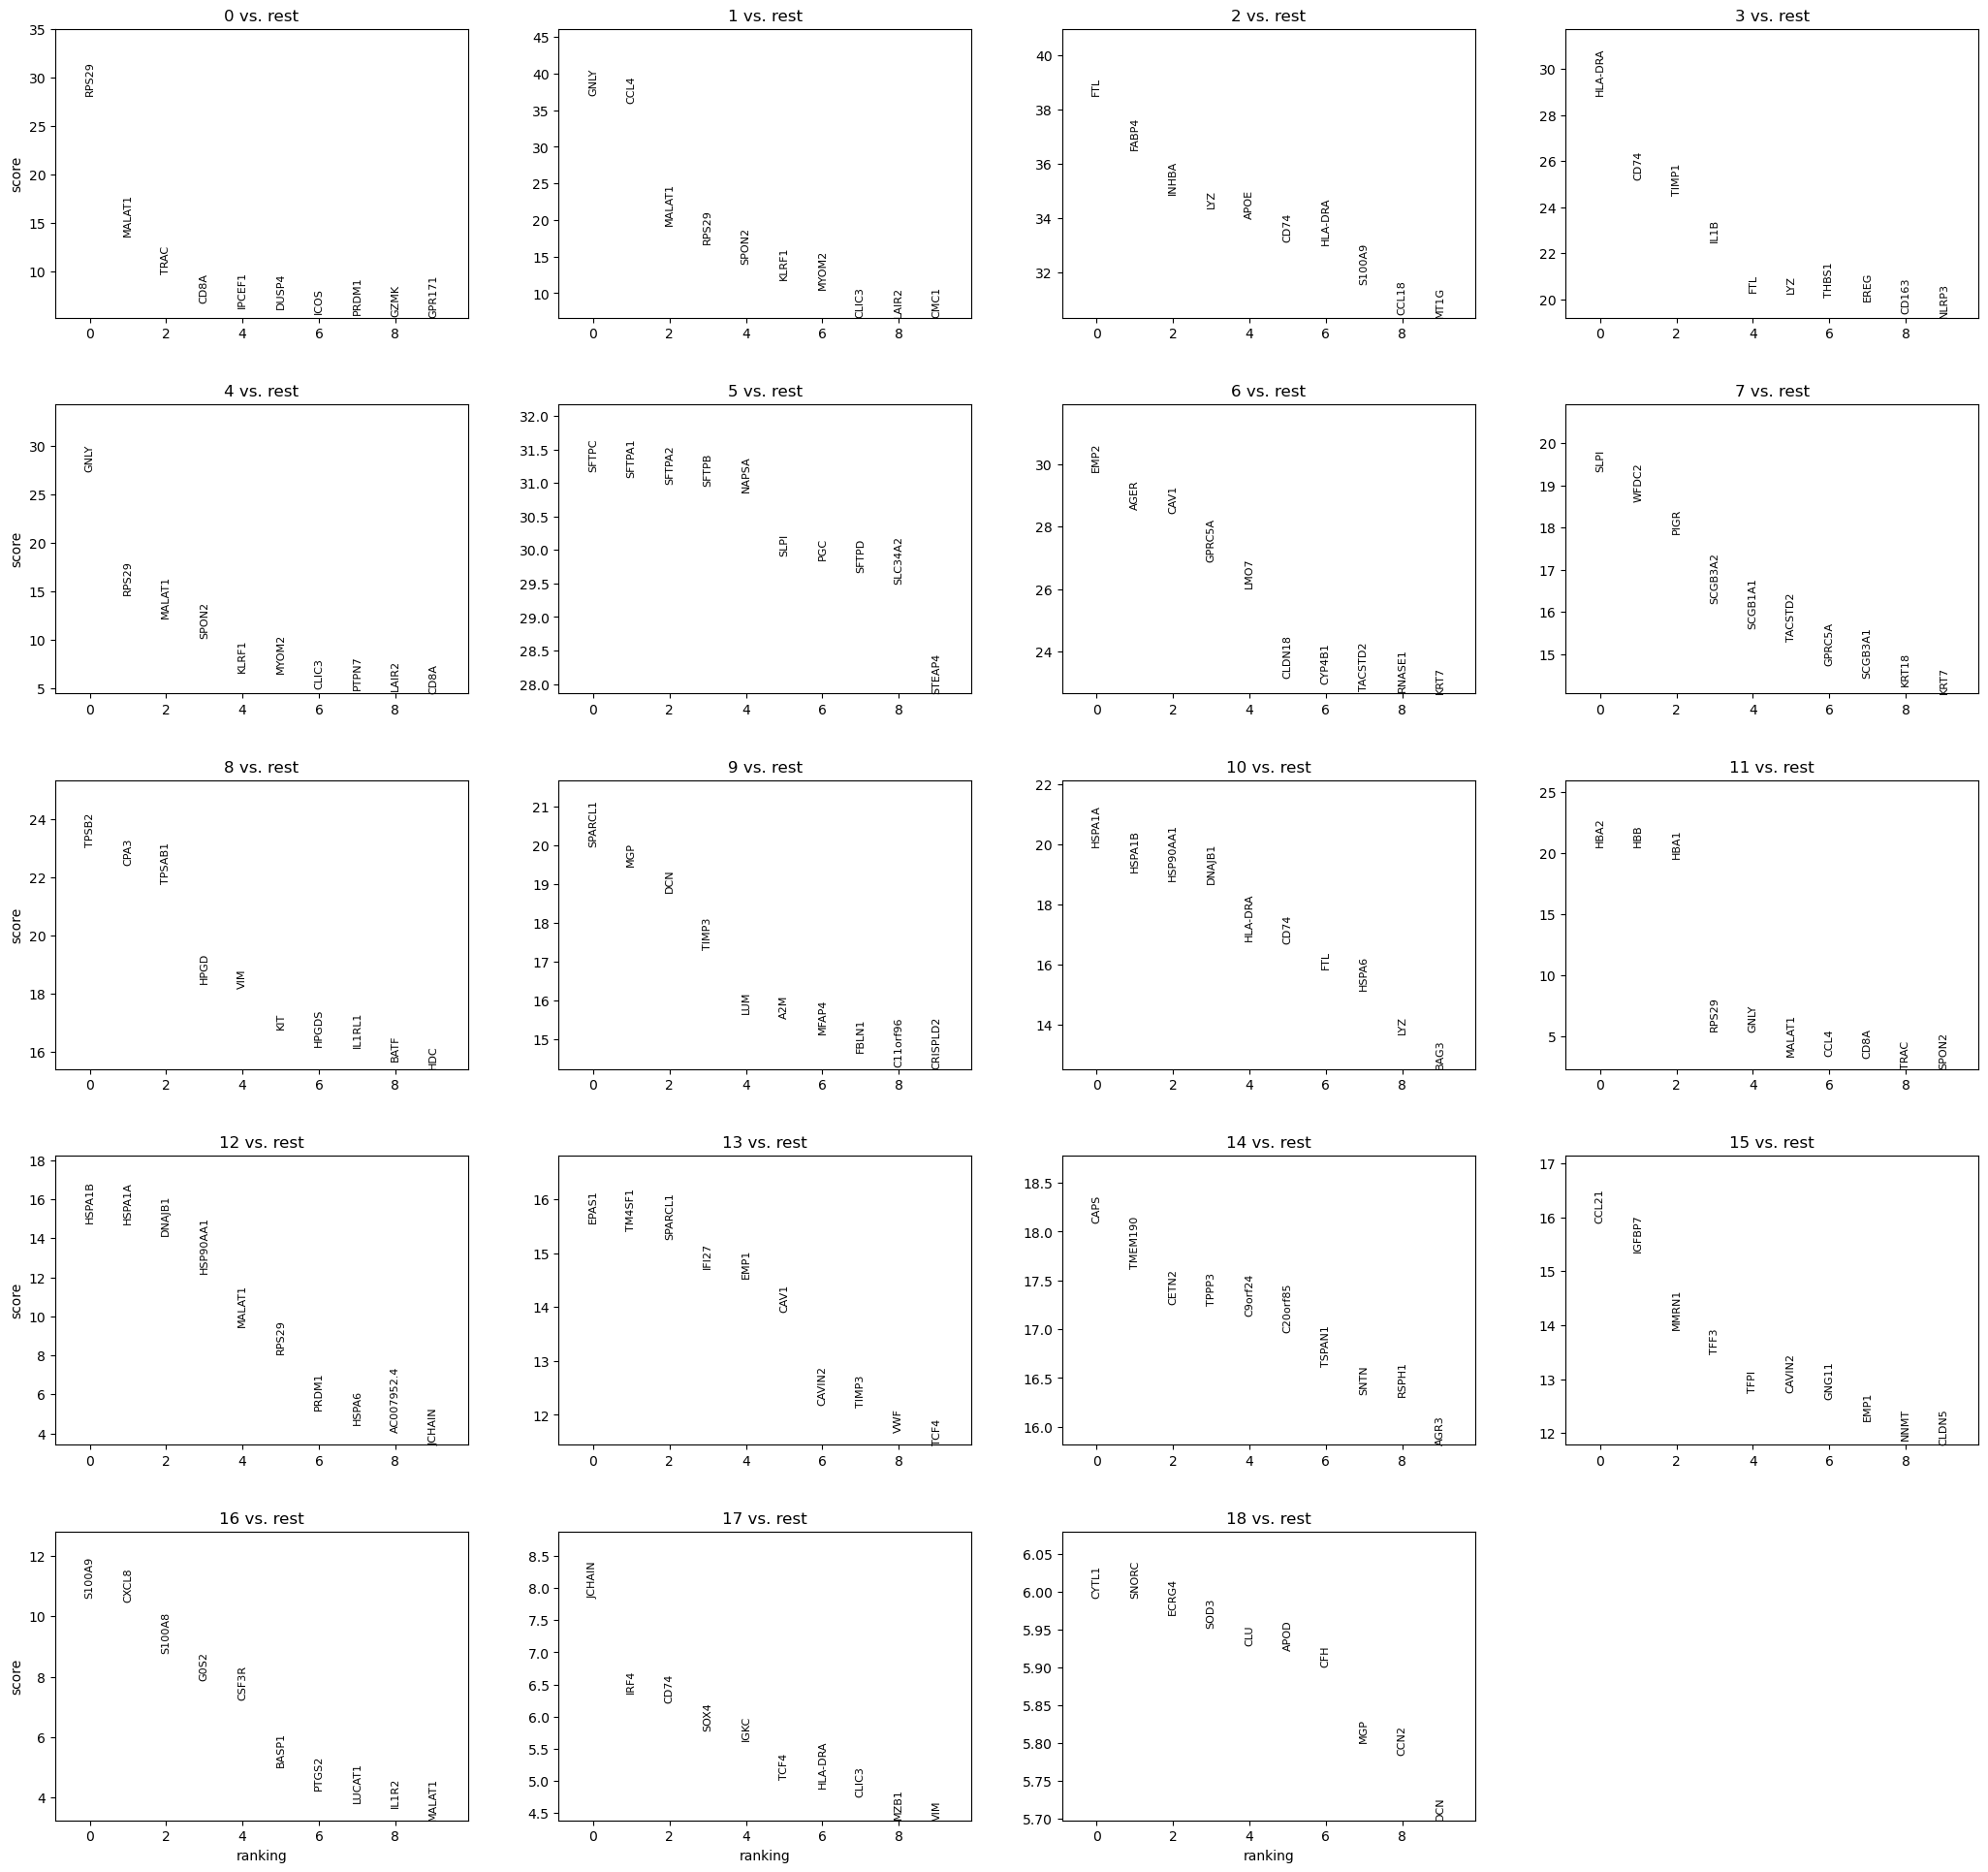

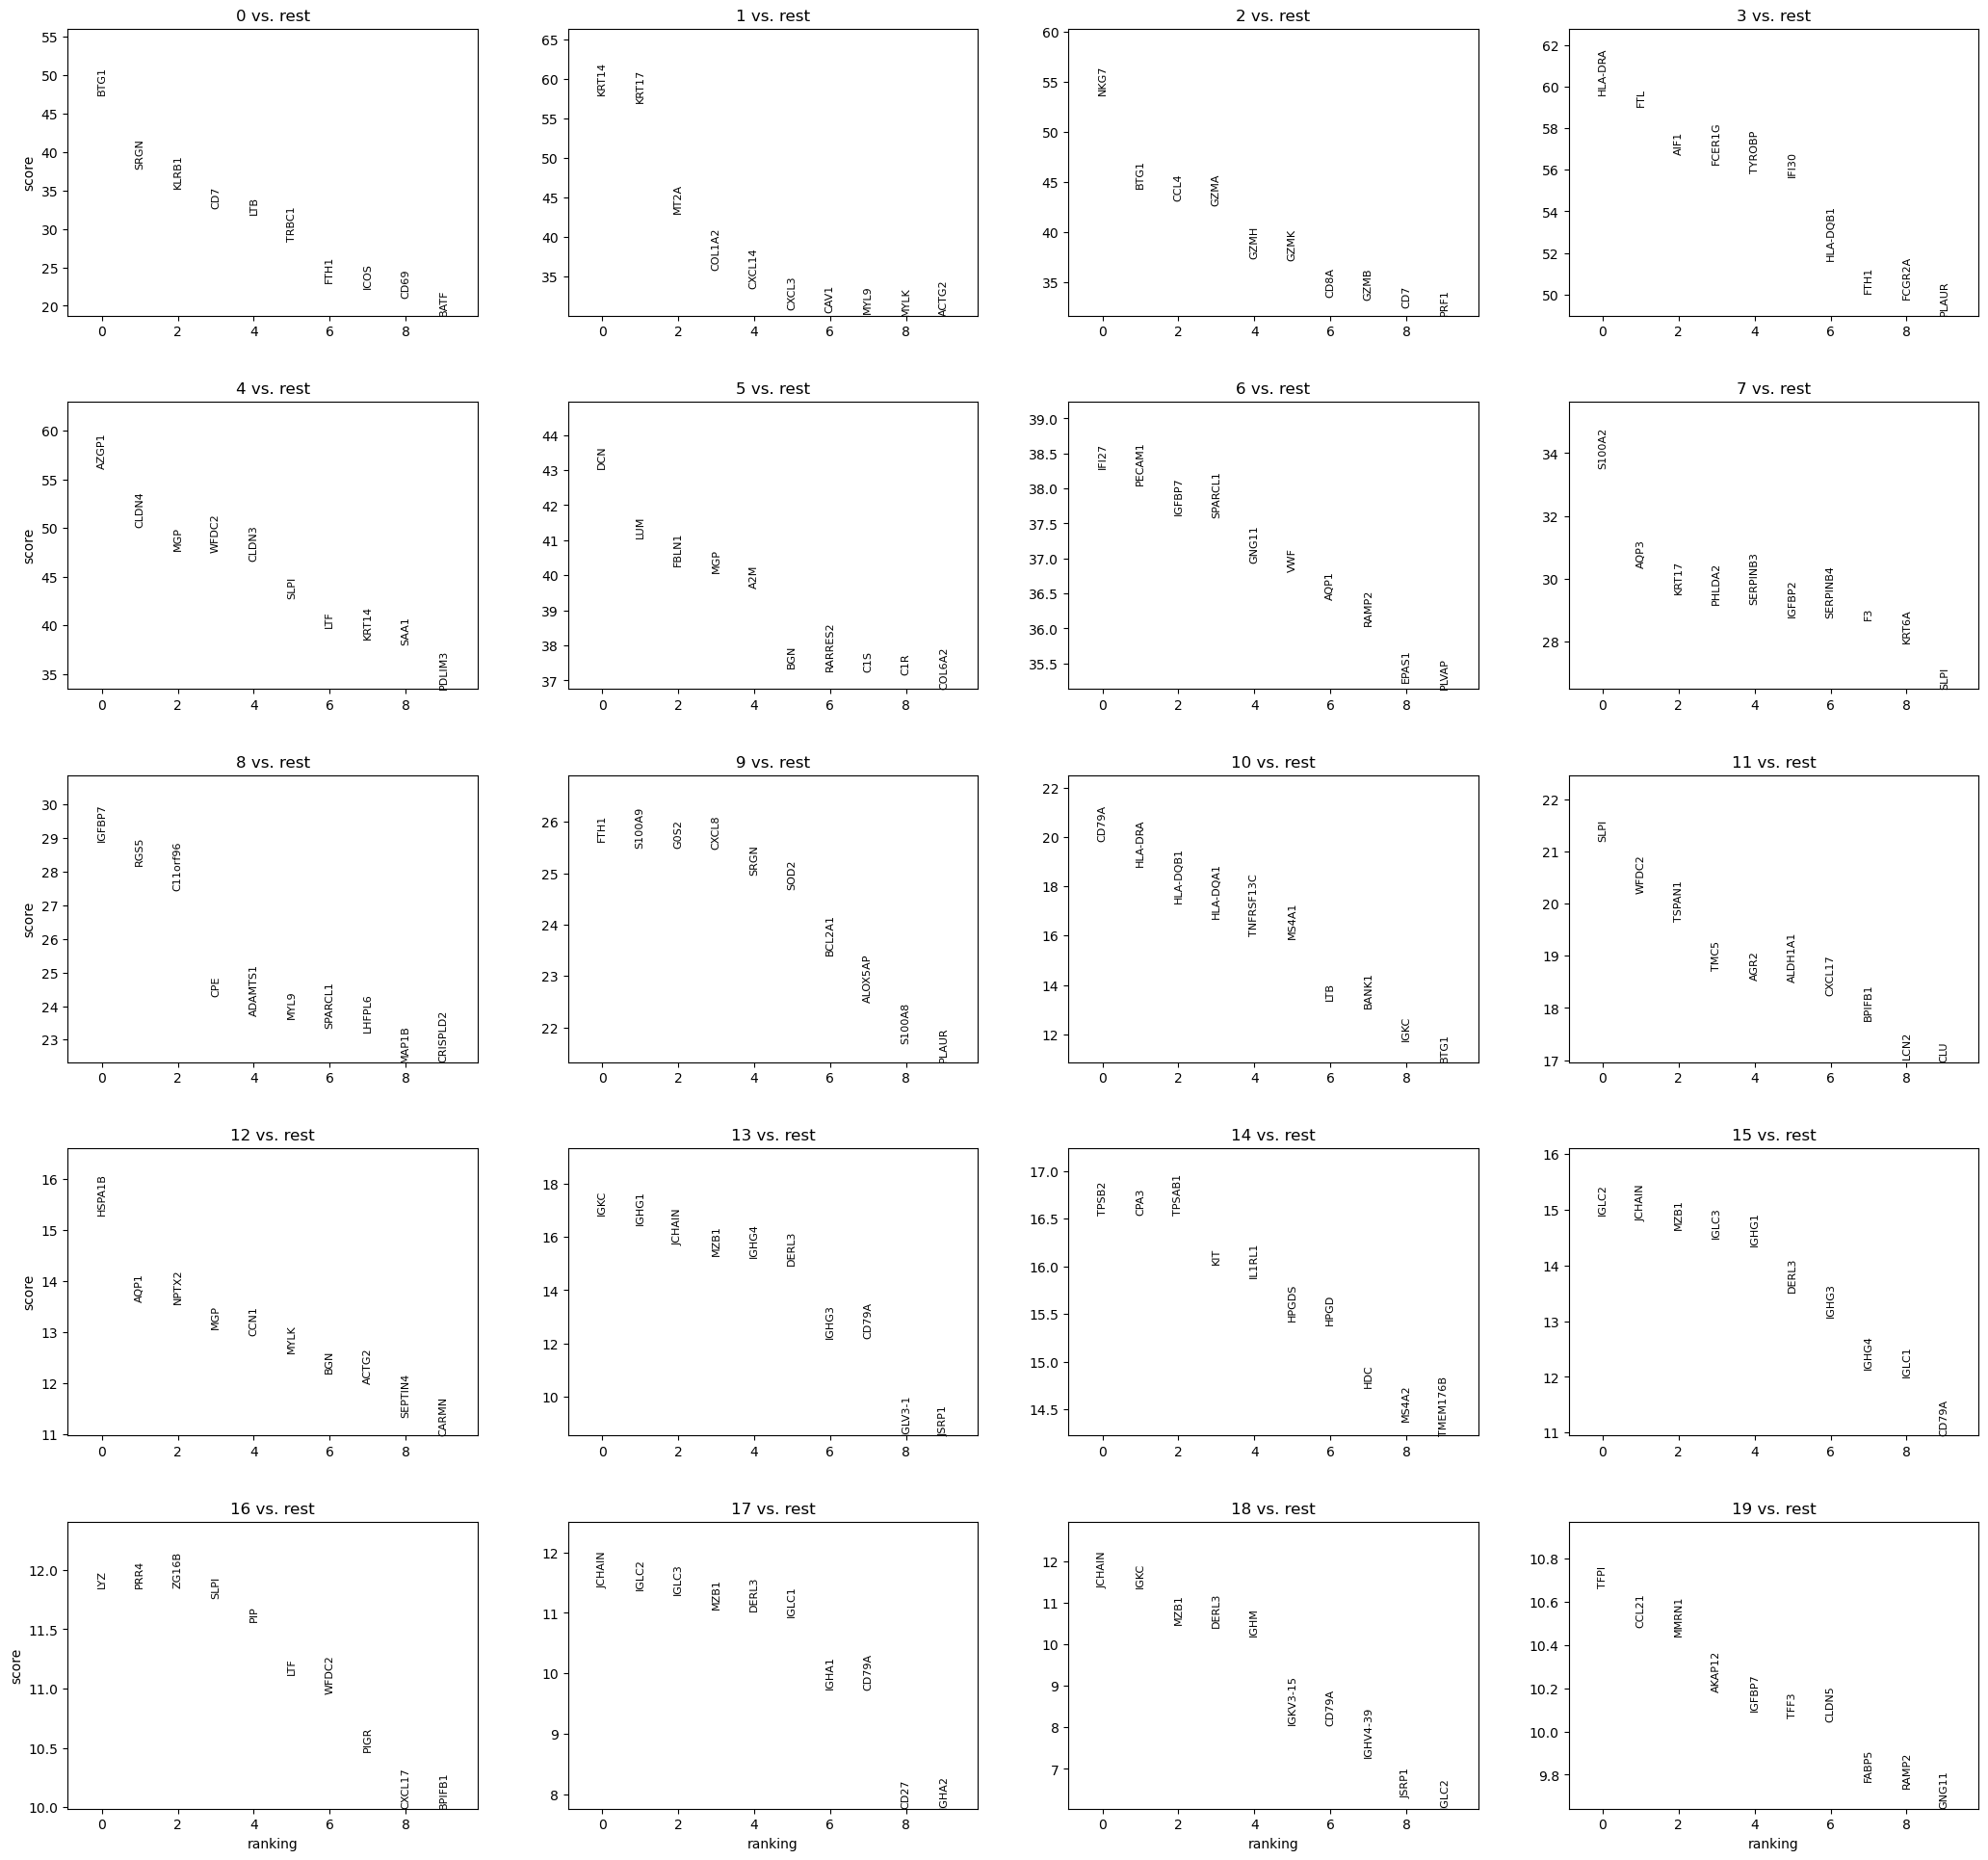

In [12]:
sc.pl.rank_genes_groups(adata_normal, n_genes=10, sharey=False)
sc.pl.rank_genes_groups(adata_tumor, n_genes=10, sharey=False)


# Dot Plot

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


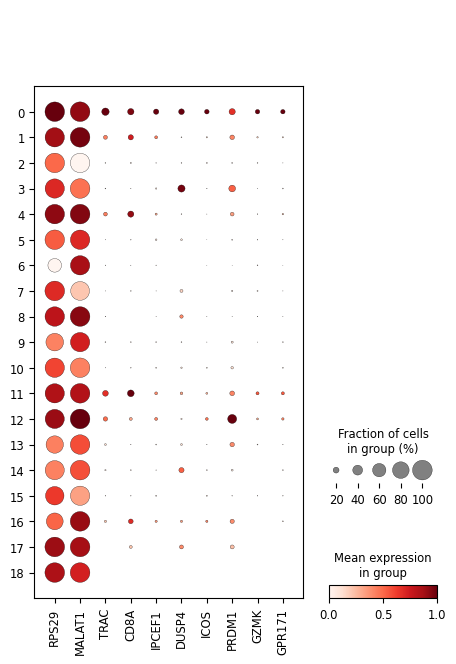

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


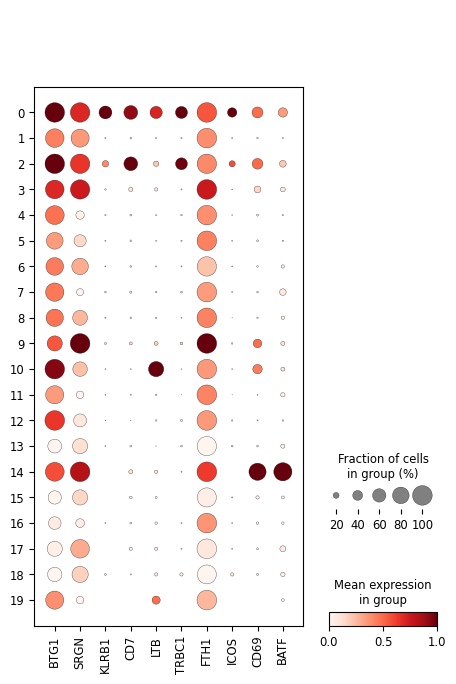

In [13]:
sc.pl.dotplot(
    adata_normal, 
    var_names=normal_result['names'].unique()[:10], 
    groupby='leiden', 
    standard_scale='var'
)

sc.pl.dotplot(
    adata_tumor, 
    var_names=tumor_result['names'].unique()[:10], 
    groupby='leiden', 
    standard_scale='var'
)


In [23]:
# Extract ranked genes for the normal sample
normal_result = sc.get.rank_genes_groups_df(adata_normal, group=None)
print("Top differential expression results for Normal sample:")
print(normal_result.head(10))  # Display the top 10 genes for reference

# Extract ranked genes for the tumor sample
tumor_result = sc.get.rank_genes_groups_df(adata_tumor, group=None)
print("Top differential expression results for Tumor sample:")
print(tumor_result.head(10))  # Display the top 10 genes for reference


Top differential expression results for Normal sample:
  group   names     scores  logfoldchanges          pvals      pvals_adj
0     0   RPS29  28.170490        1.484818  1.344796e-174  2.689592e-171
1     0  MALAT1  13.676006        0.858983   1.412395e-42   4.707984e-40
2     0    TRAC   9.768481        2.955081   1.537400e-22   2.196286e-20
3     0    CD8A   6.740058        2.077484   1.583231e-11   7.196503e-10
4     0  IPCEF1   6.224210        2.787259   4.839877e-10   1.935951e-08
5     0   DUSP4   6.156279        2.478285   7.447383e-10   2.864378e-08
6     0    ICOS   5.622163        3.757367   1.885811e-08   6.083262e-07
7     0   PRDM1   5.510255        1.692742   3.583138e-08   1.102504e-06
8     0    GZMK   5.316596        3.504640   1.057263e-07   3.127305e-06
9     0  GPR171   5.216903        3.354218   1.819391e-07   5.198259e-06
Top differential expression results for Tumor sample:
  group  names     scores  logfoldchanges          pvals      pvals_adj
0     0   BTG1  

In [25]:
# Extract the differential expression results for Normal sample
normal_results = sc.get.rank_genes_groups_df(adata_normal, group=None)

# Group by the 'group' column to get the top 10 genes for each group (cluster)
top_genes_normal = normal_results.groupby('group').head(10)

# Display the top 10 genes for each cluster in the Normal sample
print("Top 10 ranked genes for each group (cluster) in Normal sample:")
print(top_genes_normal)

# Extract the differential expression results for Tumor sample
tumor_results = sc.get.rank_genes_groups_df(adata_tumor, group=None)

# Group by the 'group' column to get the top 10 genes for each group (cluster)
top_genes_tumor = tumor_results.groupby('group').head(10)

# Save the top 10 genes for each group in the Tumor sample to CSV
top_genes_tumor.to_csv("top_genes_tumor.csv", index=False)

# Display the top 10 genes for each cluster in the Tumor sample
print("Top 10 ranked genes for each group (cluster) in Tumor sample:")
print(top_genes_tumor)


Top 10 ranked genes for each group (cluster) in Normal sample:
      group   names     scores  logfoldchanges          pvals      pvals_adj
0         0   RPS29  28.170490        1.484818  1.344796e-174  2.689592e-171
1         0  MALAT1  13.676006        0.858983   1.412395e-42   4.707984e-40
2         0    TRAC   9.768481        2.955081   1.537400e-22   2.196286e-20
3         0    CD8A   6.740058        2.077484   1.583231e-11   7.196503e-10
4         0  IPCEF1   6.224210        2.787259   4.839877e-10   1.935951e-08
...     ...     ...        ...             ...            ...            ...
36005    18    APOD   5.923317        8.946657   3.155109e-09   1.036122e-06
36006    18     CFH   5.900390        7.939870   3.626427e-09   1.036122e-06
36007    18     MGP   5.801171        8.239944   6.585344e-09   1.615527e-06
36008    18    CCN2   5.784568        7.569527   7.269871e-09   1.615527e-06
36009    18     DCN   5.697505        7.394138   1.215738e-08   2.431476e-06

[190 rows x 

# UMAP/TSNE with Marker Genes

In [15]:
# Compute UMAP for Normal sample
sc.tl.umap(adata_normal)

# Compute UMAP for Tumor sample
sc.tl.umap(adata_tumor)



# Visualize top 5 differentially expressed genes on UMAP

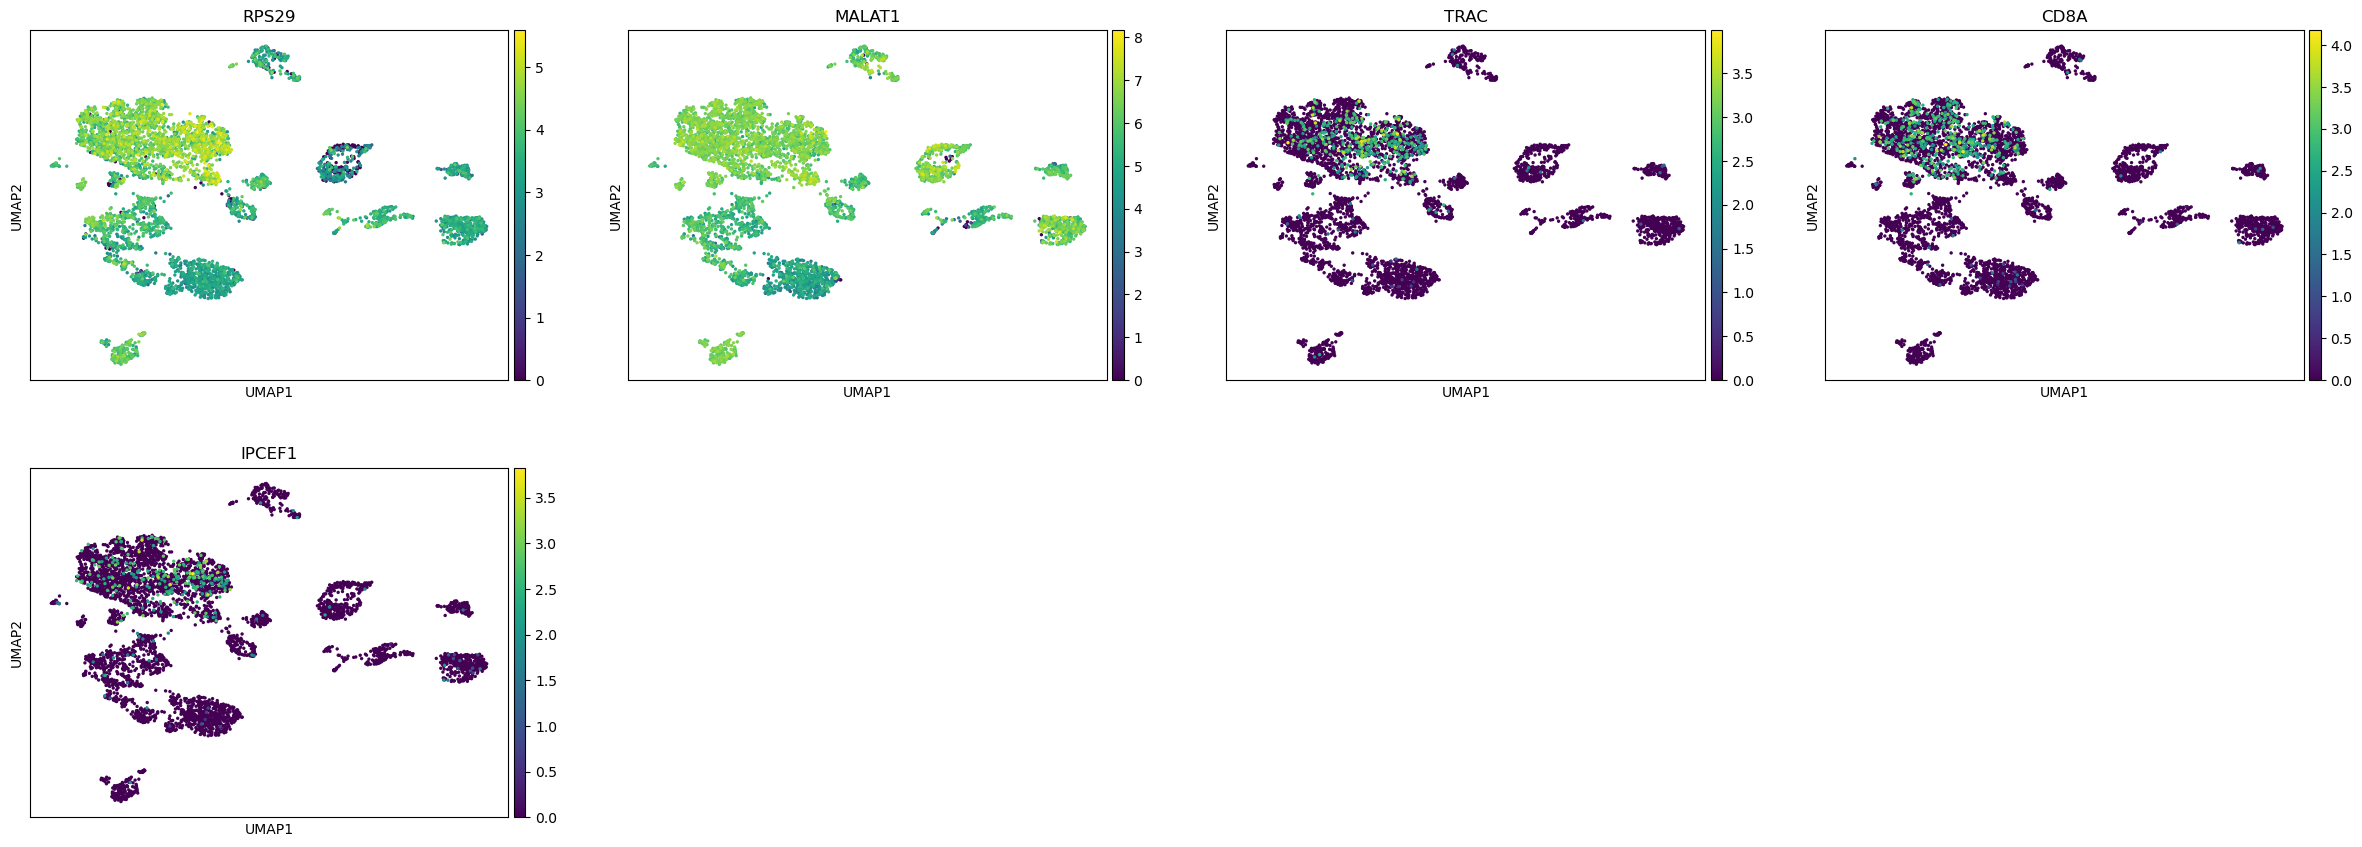

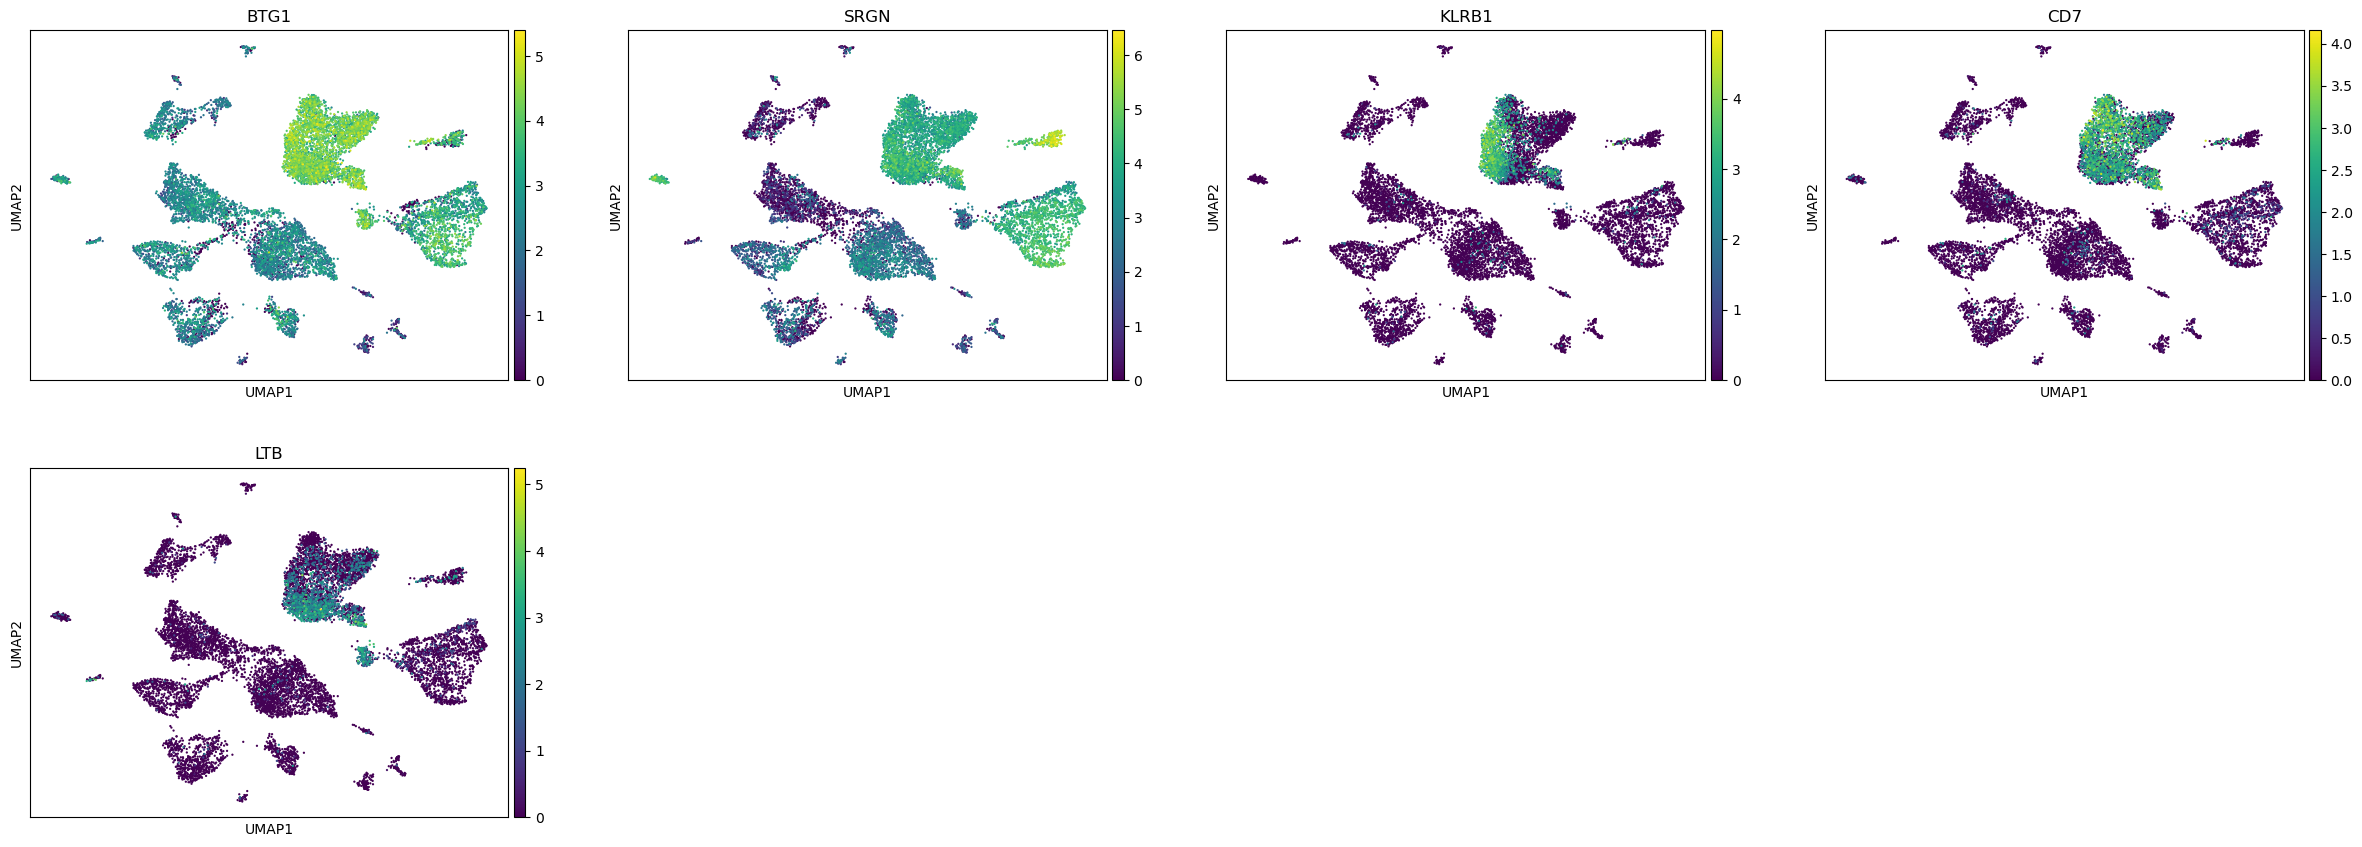

In [16]:
# Visualize top 5 differentially expressed genes on UMAP
sc.pl.umap(adata_normal, color=normal_result['names'].unique()[:5])
sc.pl.umap(adata_tumor, color=tumor_result['names'].unique()[:5])


# Another code

# Scaling and Dimensionality Reduction





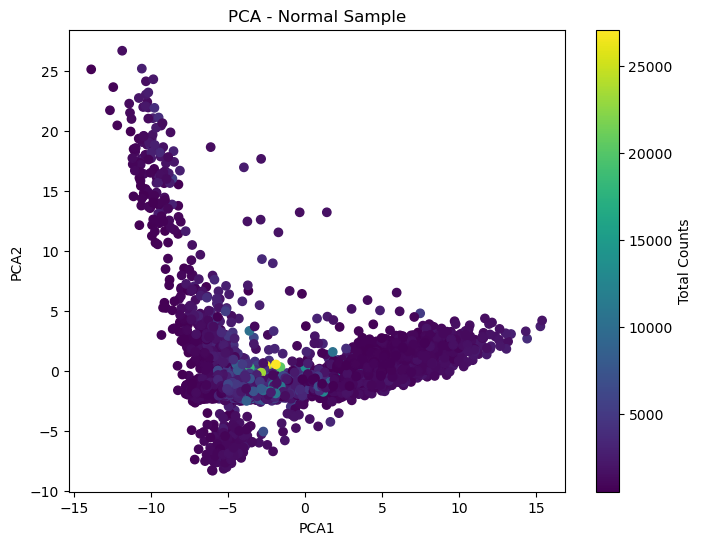

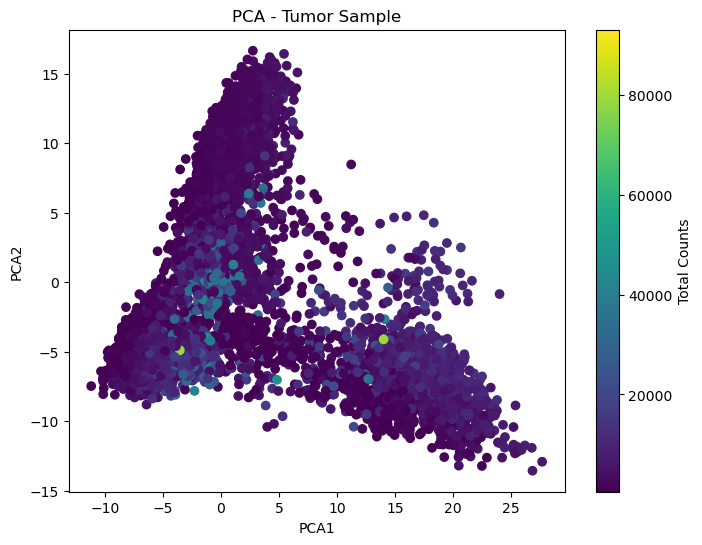

In [18]:
import matplotlib.pyplot as plt

# Plot the first two PCA components for Normal
plt.figure(figsize=(8, 6))
plt.scatter(adata_normal.obsm['X_pca'][:, 0], adata_normal.obsm['X_pca'][:, 1], c=adata_normal.obs['total_counts'], cmap='viridis')
plt.colorbar(label="Total Counts")
plt.title("PCA - Normal Sample")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Plot the first two PCA components for Tumor
plt.figure(figsize=(8, 6))
plt.scatter(adata_tumor.obsm['X_pca'][:, 0], adata_tumor.obsm['X_pca'][:, 1], c=adata_tumor.obs['total_counts'], cmap='viridis')
plt.colorbar(label="Total Counts")
plt.title("PCA - Tumor Sample")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()



# Clustering and Neighborhood Graph



* What it does:

Calculates the similarity between cells based on their gene expression profiles.
Uses n_neighbors=15 to define how many closest cells (neighbors) should be considered for each cell.
Uses the first 40 principal components (PCs) to represent the data (from PCA) for this calculation.
Why it's important:

This step builds a "graph" of cells, where similar cells are connected. This graph is the basis for clustering.

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


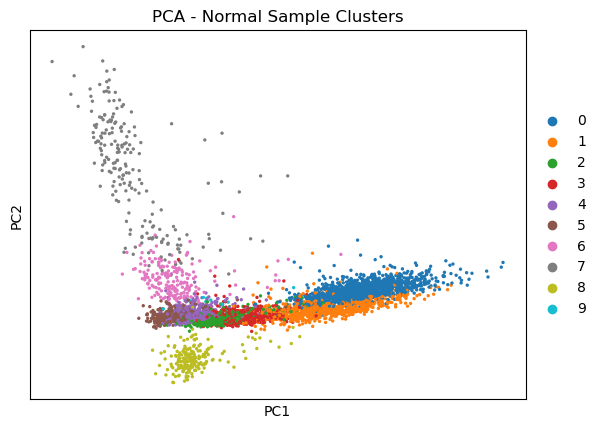

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


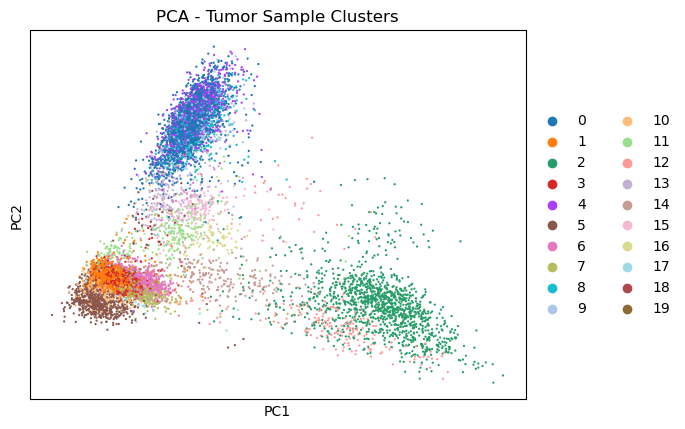

In [19]:
# Compute nearest neighbors and clustering
sc.pp.neighbors(adata_normal, n_neighbors=15, n_pcs=40)
sc.pp.neighbors(adata_tumor, n_neighbors=15, n_pcs=40)

# Compute clustering with Leiden algorithm
sc.tl.leiden(adata_normal, resolution=0.5)
sc.tl.leiden(adata_tumor, resolution=0.5)

# Visualize clusters on PCA plot
sc.pl.pca(adata_normal, color="leiden", title="PCA - Normal Sample Clusters")
sc.pl.pca(adata_tumor, color="leiden", title="PCA - Tumor Sample Clusters")


# UMAP for Dimensionality Reduction



* What it does:

Calculates the UMAP embeddings for the cells in your datasets.
UMAP is a dimensionality reduction technique, like PCA, but it’s better at preserving the local structure and relationships between cells.
The result is a 2D or 3D embedding, where cells with similar gene expression profiles are placed close to each other.
Why it’s important:

It provides a clearer, more intuitive visualization of the data, helping you see clusters or patterns more easily.


C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


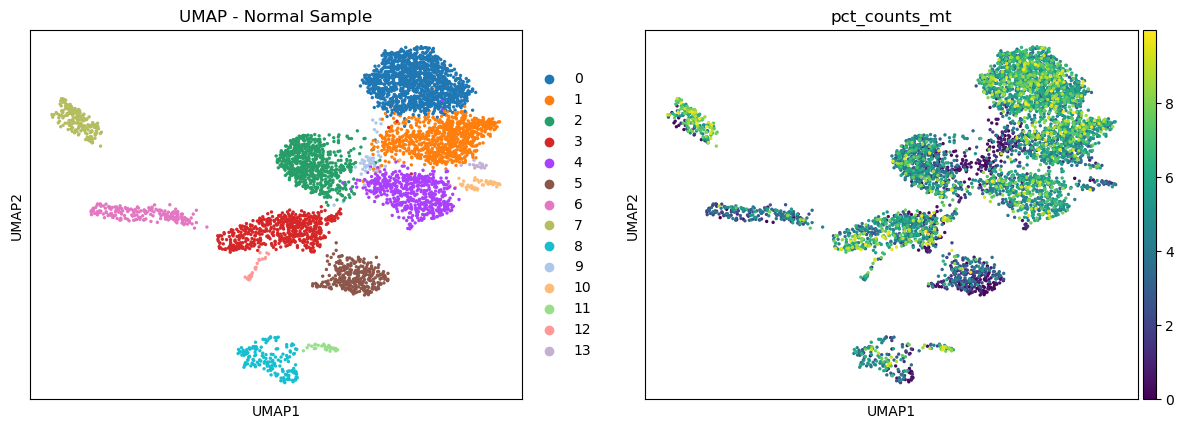

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


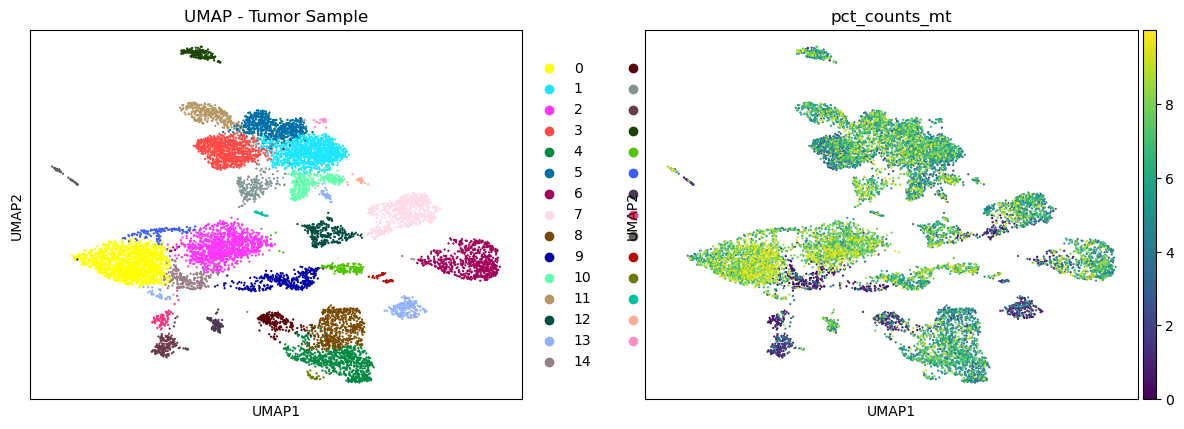

In [35]:
# Compute UMAP
sc.tl.umap(adata_normal)
sc.tl.umap(adata_tumor)

# Visualize UMAP embeddings
sc.pl.umap(adata_normal, color=["leiden", "pct_counts_mt"], title="UMAP - Normal Sample")
sc.pl.umap(adata_tumor, color=["leiden", "pct_counts_mt"], title="UMAP - Tumor Sample")


# Differential Gene Expression Analysis


* What it does:

Compares the gene expression levels in each cluster (defined by the leiden clustering) against all other clusters to find genes that are uniquely upregulated in that cluster.
Uses the Wilcoxon rank-sum test (method="wilcoxon") to determine statistical significance.
Results include:
The top genes for each cluster (called "marker genes").
Statistical metrics like p-values for the significance of the difference.
Why it’s important:

Marker genes help characterize and label each cluster (e.g., identifying cell types or functional states).


Plots the top 20 marker genes for each cluster.
The x-axis shows the clusters (e.g., Leiden clusters).
The y-axis lists the top marker genes for each cluster, typically sorted by their significance or fold-change.
Why it’s important:

The plot gives a quick overview of which genes are uniquely expressed in each cluster, helping you interpret and label the clusters biologicall

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py

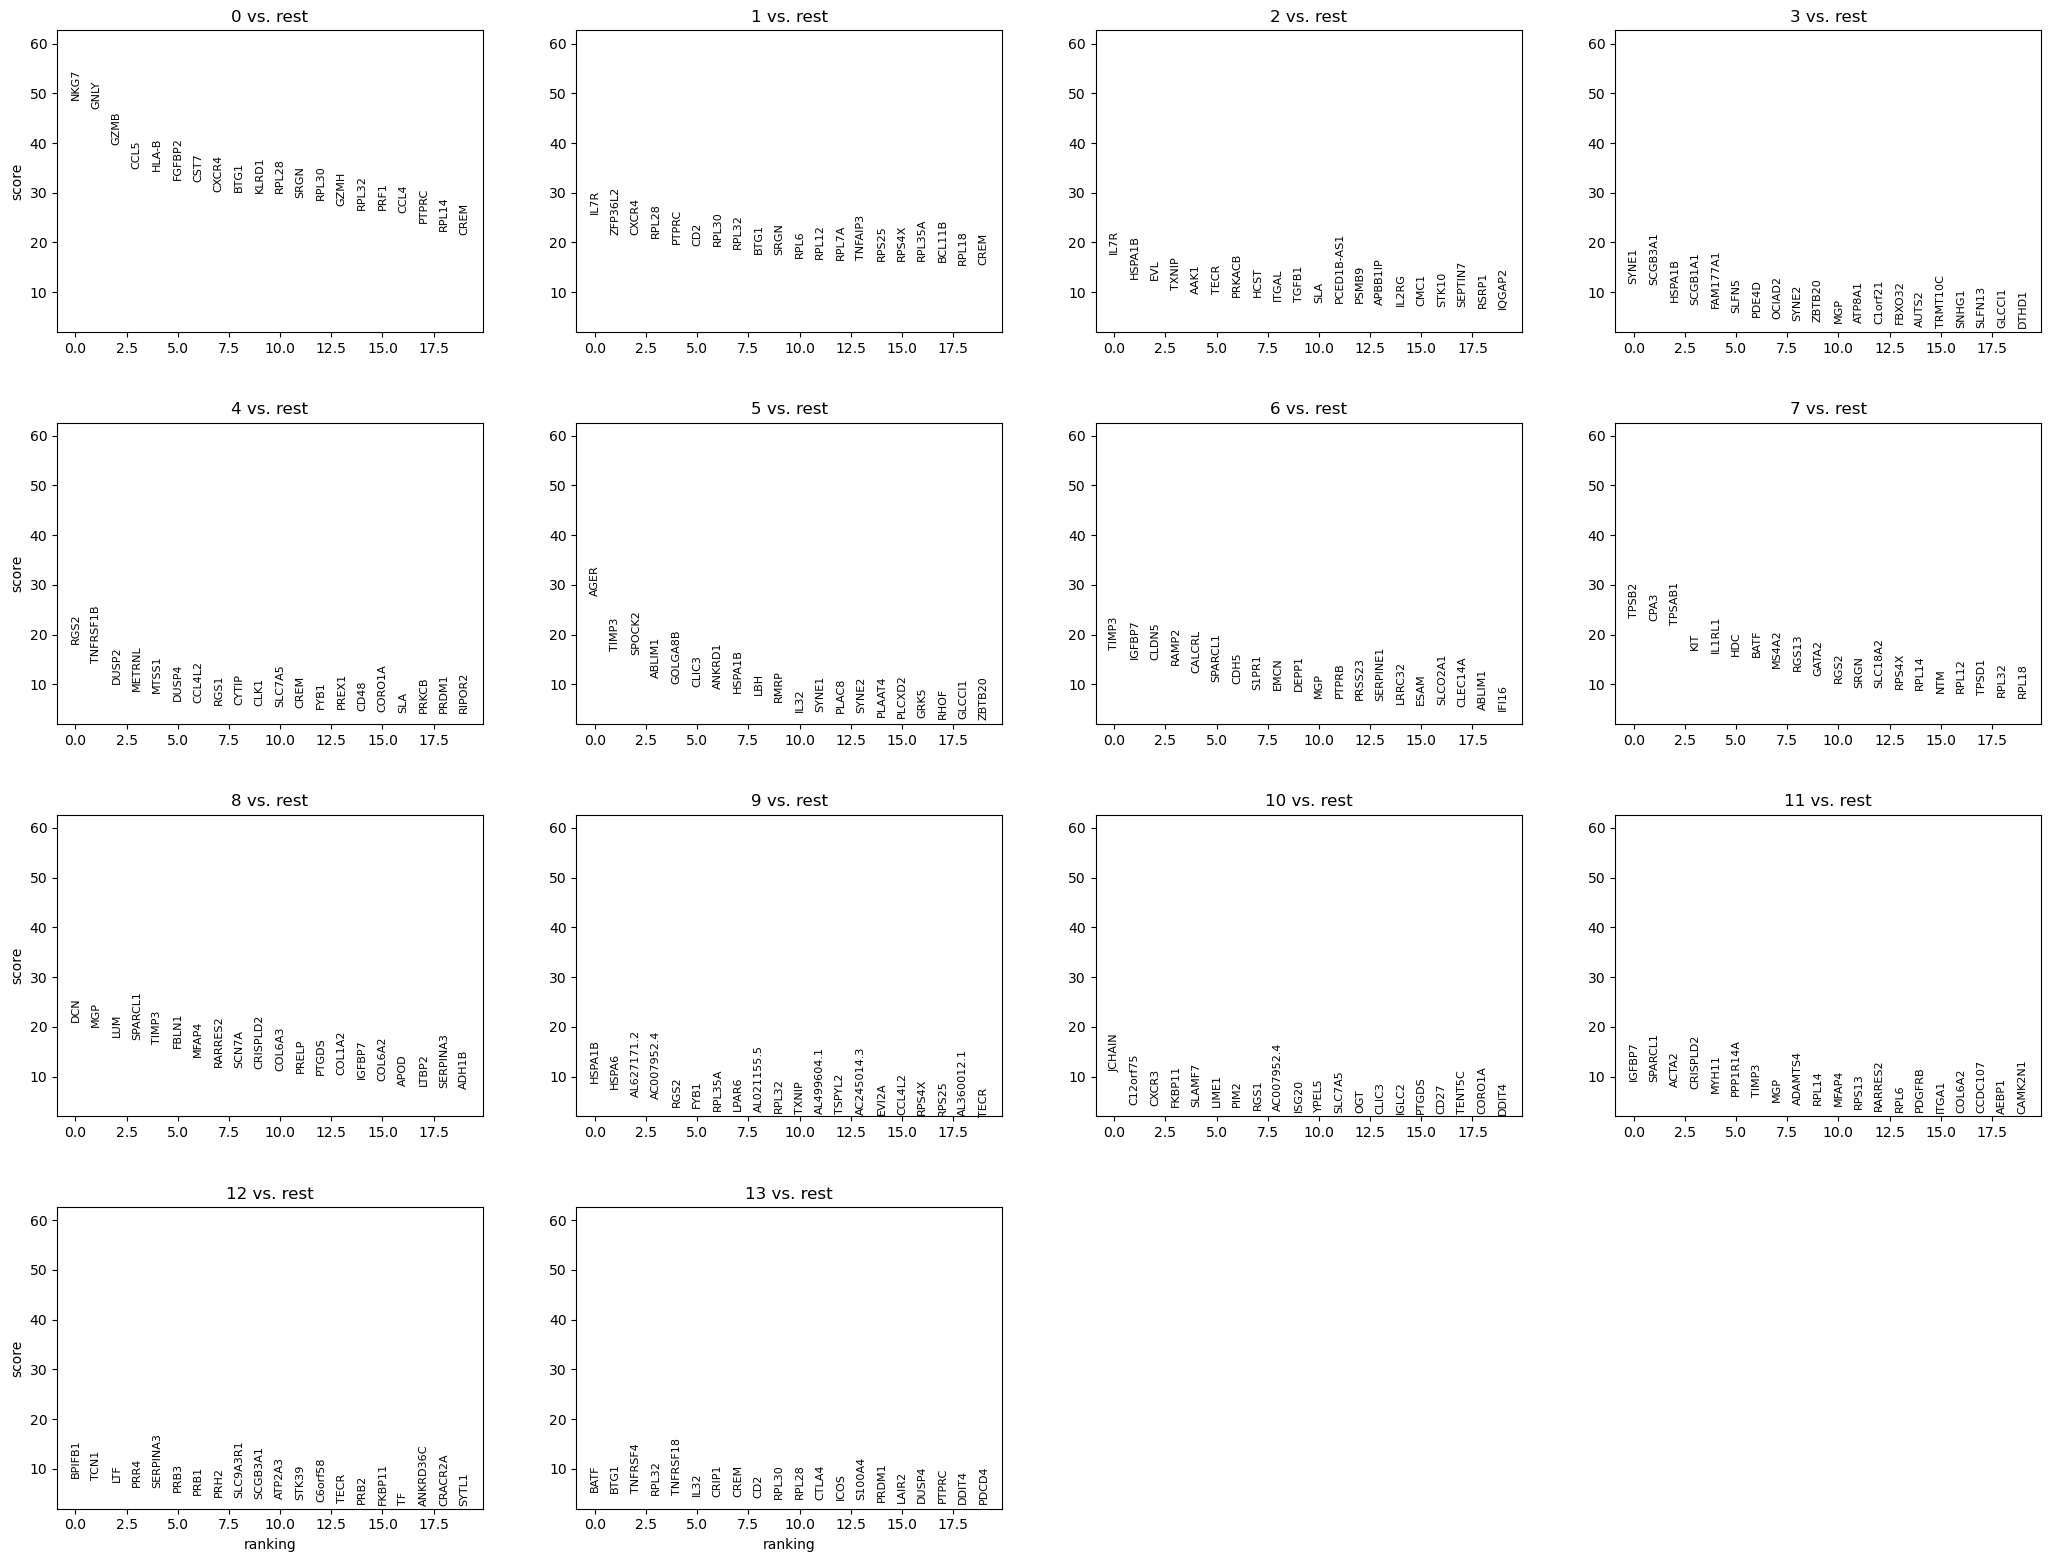

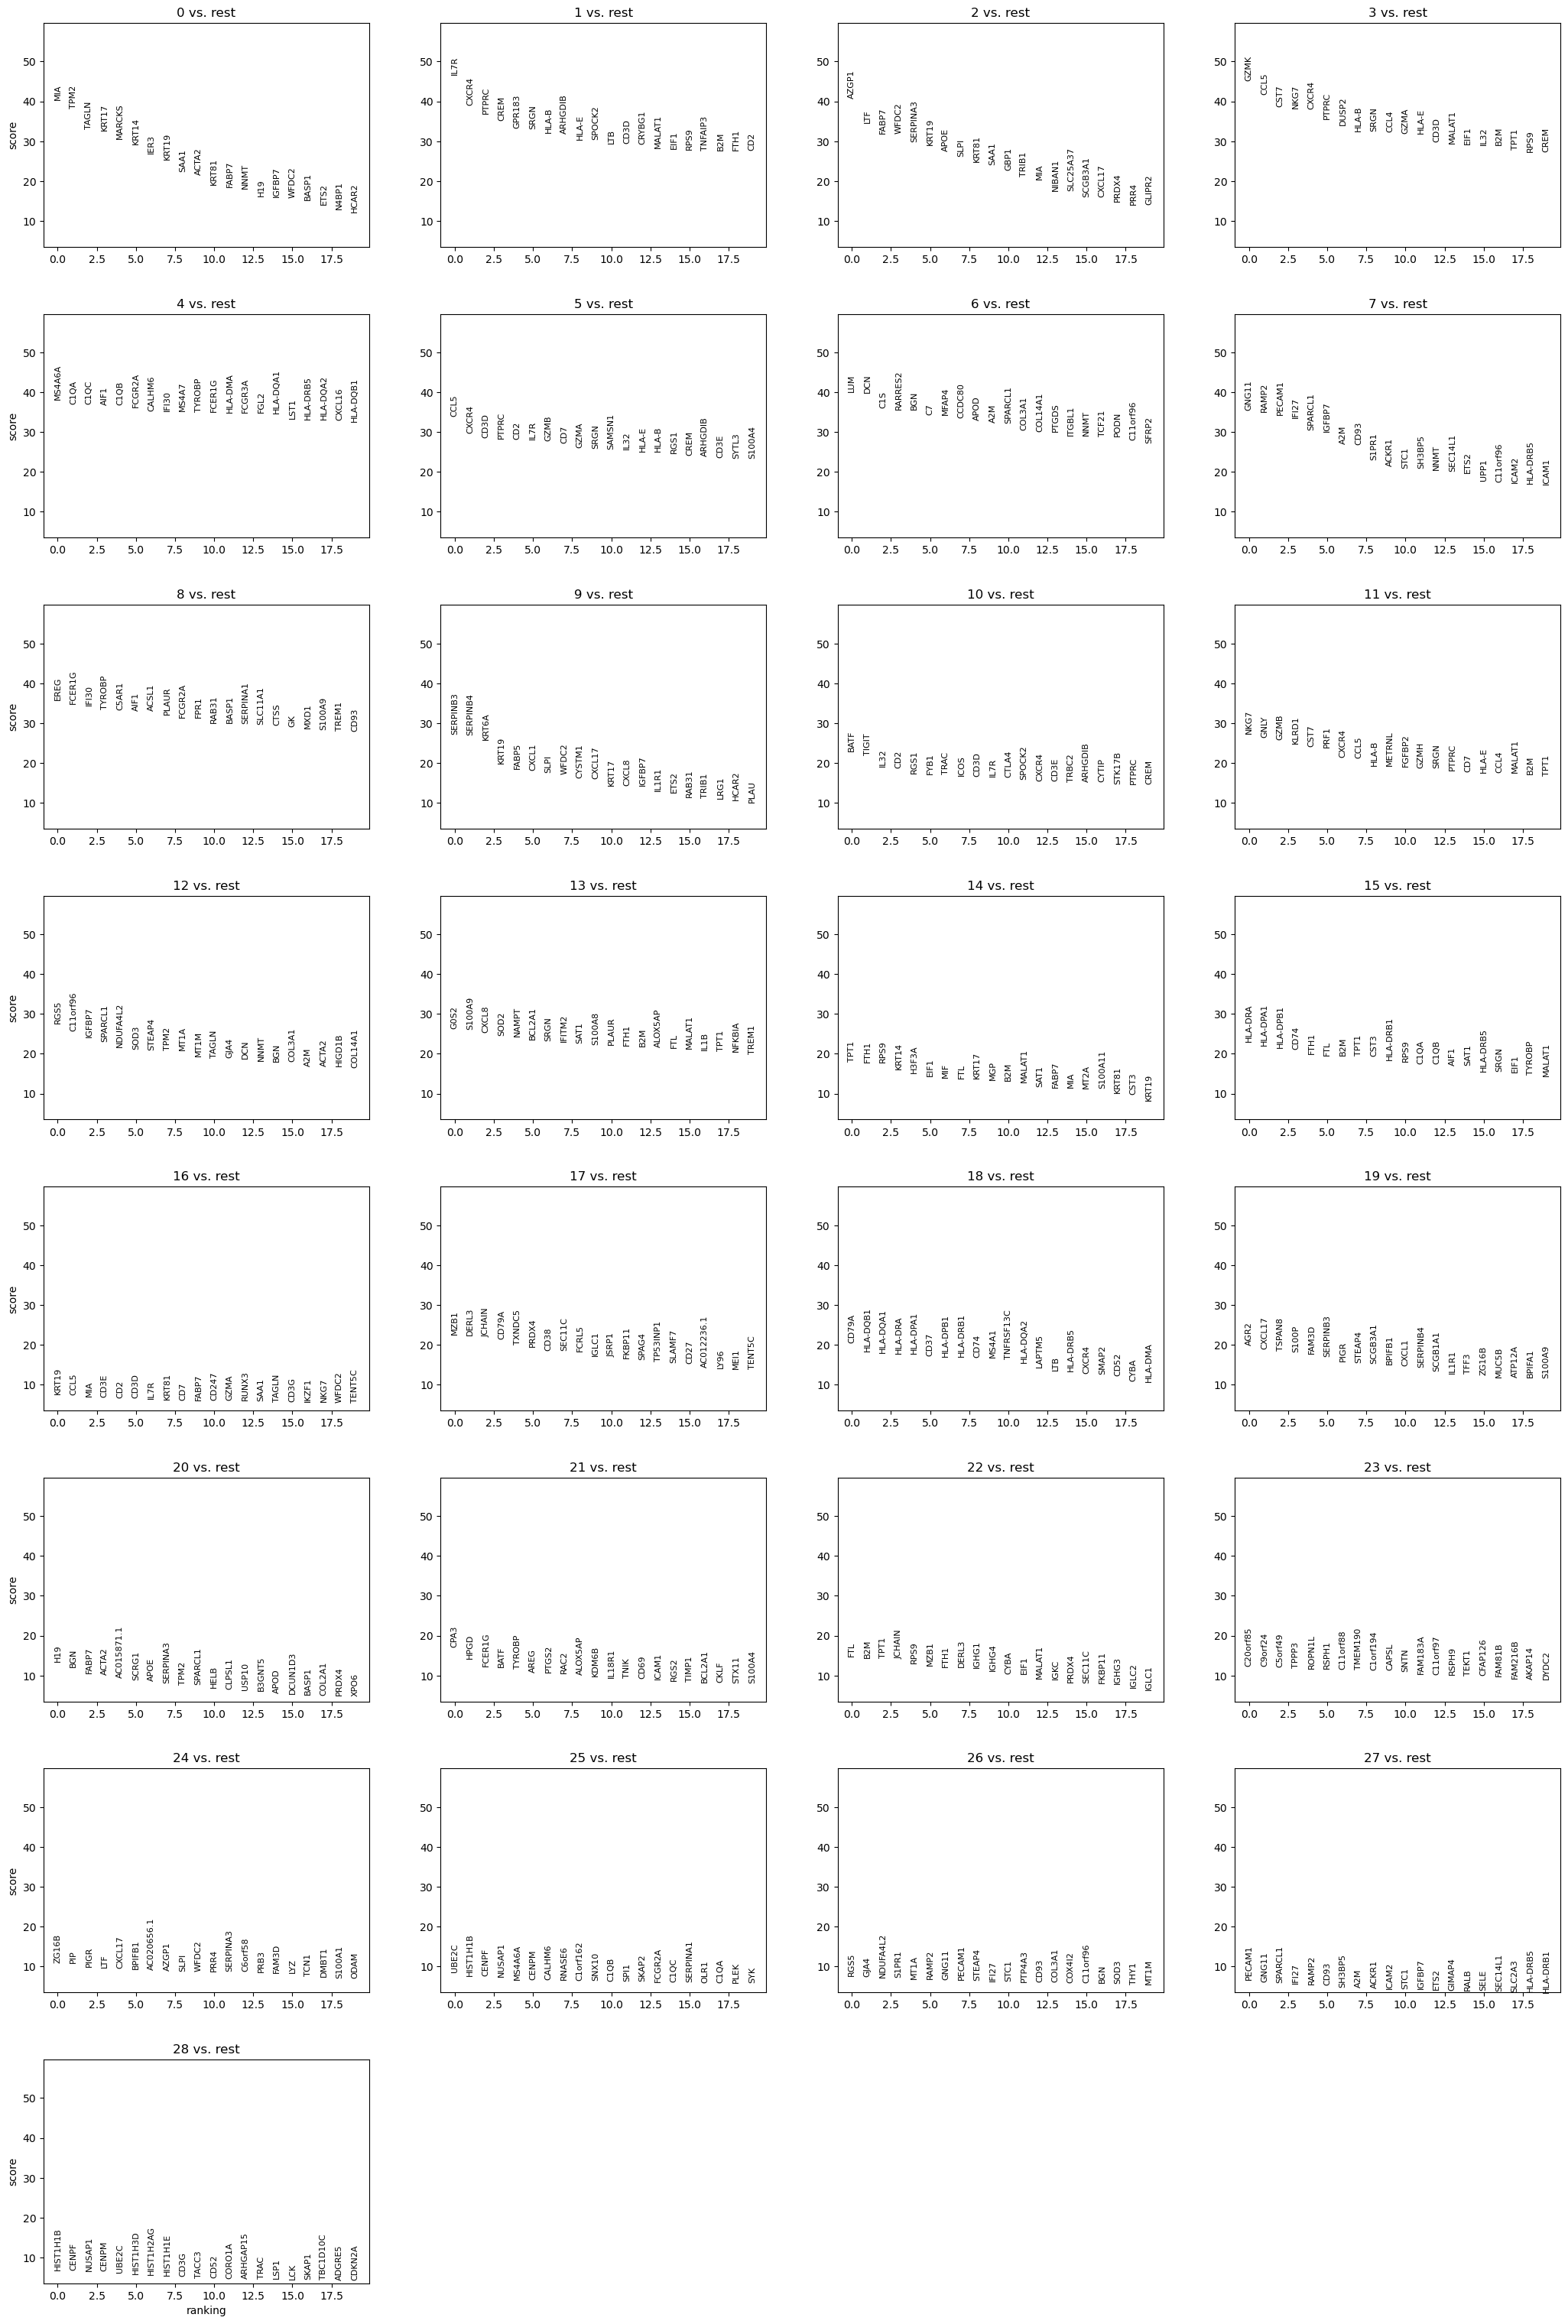

In [36]:
# Perform differential gene expression analysis
sc.tl.rank_genes_groups(adata_normal, groupby="leiden", method="wilcoxon")
sc.tl.rank_genes_groups(adata_tumor, groupby="leiden", method="wilcoxon")

# Visualize marker genes
sc.pl.rank_genes_groups(adata_normal, n_genes=20, title="Marker Genes - Normal Sample")
sc.pl.rank_genes_groups(adata_tumor, n_genes=20, title="Marker Genes - Tumor Sample")


In [37]:
# Extract top 10 marker genes for each cluster

def get_top_marker_genes(adata, n_genes=10):
    # Retrieve the results of rank_genes_groups
    results = adata.uns['rank_genes_groups']
    groups = results['names'].dtype.names  # Cluster names
    
    # Create a DataFrame to store the top marker genes for each cluster
    top_genes_df = pd.DataFrame({group: results['names'][group][:n_genes] for group in groups})
    
    return top_genes_df

# Get top 10 marker genes for normal and tumor samples
top_genes_normal = get_top_marker_genes(adata_normal, n_genes=10)
top_genes_tumor = get_top_marker_genes(adata_tumor, n_genes=10)

# Display the top 10 marker genes
print("Top 10 Marker Genes - Normal Sample:")
print(top_genes_normal)

print("\nTop 10 Marker Genes - Tumor Sample:")
print(top_genes_tumor)

# Save the results to CSV files for further analysis
top_genes_normal.to_csv("top_marker_genes_normal.csv", index=False)
top_genes_tumor.to_csv("top_marker_genes_tumor.csv", index=False)


Top 10 Marker Genes - Normal Sample:
        0        1       2         3         4        5        6       7  \
0    NKG7     IL7R    IL7R     SYNE1      RGS2     AGER    TIMP3   TPSB2   
1    GNLY  ZFP36L2  HSPA1B   SCGB3A1  TNFRSF1B    TIMP3   IGFBP7    CPA3   
2    GZMB    CXCR4     EVL    HSPA1B     DUSP2   SPOCK2    CLDN5  TPSAB1   
3    CCL5    RPL28   TXNIP   SCGB1A1    METRNL   ABLIM1    RAMP2     KIT   
4   HLA-B    PTPRC    AAK1  FAM177A1     MTSS1  GOLGA8B   CALCRL  IL1RL1   
5  FGFBP2      CD2    TECR     SLFN5     DUSP4    CLIC3  SPARCL1     HDC   
6    CST7    RPL30  PRKACB     PDE4D    CCL4L2   ANKRD1     CDH5    BATF   
7   CXCR4    RPL32    HCST    OCIAD2      RGS1   HSPA1B    S1PR1   MS4A2   
8    BTG1     BTG1   ITGAL     SYNE2     CYTIP      LBH     EMCN   RGS13   
9   KLRD1     SRGN   TGFB1    ZBTB20      CLK1     RMRP    DEPP1   GATA2   

          8           9          10        11        12        13  
0       DCN      HSPA1B      JCHAIN    IGFBP7    BPIFB1   

In [43]:


# Function to get marker genes with scores, filtering NaN values
def get_marker_genes_with_scores(adata, n_genes=10):
    # Retrieve the results of rank_genes_groups
    results = adata.uns['rank_genes_groups']
    groups = results['names'].dtype.names  # Cluster names
    
    # Create a list to store the results
    marker_data = []
    
    for group in groups:
        # Get the names of the top genes, log fold changes, and p-values
        gene_names = results['names'][group][:n_genes]
        log_fold_changes = results['logfoldchanges'][group][:n_genes]
        p_values = results['pvals'][group][:n_genes]
        scores = results['scores'][group][:n_genes]
        
        # Handle NaN values (optional: replace with zero or remove)
        log_fold_changes = [x if not pd.isna(x) else 0 for x in log_fold_changes]
        p_values = [x if not pd.isna(x) else 1 for x in p_values]  # Replace NaN p-values with 1 (non-significant)
        scores = [x if not pd.isna(x) else 0 for x in scores]
        
        # Combine the data for the current group
        for i in range(n_genes):
            marker_data.append({
                'Cluster': group,
                'Gene': gene_names[i],
                'LogFoldChange': log_fold_changes[i],
                'PValue': p_values[i],
                'Score': scores[i]
            })
    
    # Convert the list into a DataFrame
    marker_df = pd.DataFrame(marker_data)
    
    # Filter rows where all log fold changes are NaN (if any)
    marker_df = marker_df[~marker_df['LogFoldChange'].isna()]
    
    return marker_df

# Get the marker genes with scores for normal and tumor samples
marker_genes_normal = get_marker_genes_with_scores(adata_normal, n_genes=10)
marker_genes_tumor = get_marker_genes_with_scores(adata_tumor, n_genes=10)

# Display the marker genes data for normal and tumor samples
print("Marker Genes with Scores - Normal Sample:")
print(marker_genes_normal)

print("\nMarker Genes with Scores - Tumor Sample:")
print(marker_genes_tumor)

# Save the results to CSV files for further analysis
marker_genes_normal.to_csv("marker_genes_normal_with_scores.csv", index=False)
marker_genes_tumor.to_csv("marker_genes_tumor_with_scores.csv", index=False)


Marker Genes with Scores - Normal Sample:
    Cluster   Gene  LogFoldChange         PValue      Score
0         0   NKG7              0   0.000000e+00  48.655174
1         0   GNLY              0   0.000000e+00  46.894218
2         0   GZMB              0   0.000000e+00  39.642483
3         0   CCL5              0  8.630240e-265  34.763618
4         0  HLA-B              0  8.402688e-259  34.365021
..      ...    ...            ...            ...        ...
135      13   IL32              0   5.226612e-06   4.555480
136      13  CRIP1              0   1.383358e-05   4.346486
137      13   CREM              0   1.449591e-05   4.336212
138      13    CD2              0   3.521712e-05   4.136807
139      13  RPL30              0   5.677070e-05   4.025846

[140 rows x 5 columns]

Marker Genes with Scores - Tumor Sample:
    Cluster       Gene  LogFoldChange         PValue      Score
0         0        MIA              0   0.000000e+00  40.278130
1         0       TPM2              0   0.00

# Cell Annotation

In [ ]:
# Define cluster labels based on marker genes and manual lookup
cluster_labels_normal = {
    "0": "Basal cells",          # Cluster 0 has T-cell markers
    "1": "T-cells",          # Cluster 1 has B-cell markers
    "2": "Basal cells",
    "3": "Gamma delta T cells",
    "4": "Dendritic cells",
    "5": "T-cells",
    "6": "Fibroblasts",
    "7": "Endothelial cells",
    "8": "Dendritic cells",
    "9": "Luminal epithelial and Basal cells",
    
    # Cluster 2 has epithelial markers
    # You can keep adding more clusters as needed
}

# Assign these labels to your clusters in the `adata` object
adata_normal.obs['cell_type'] = adata_normal.obs['leiden'].map(cluster_labels_normal)


# Method 2 

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


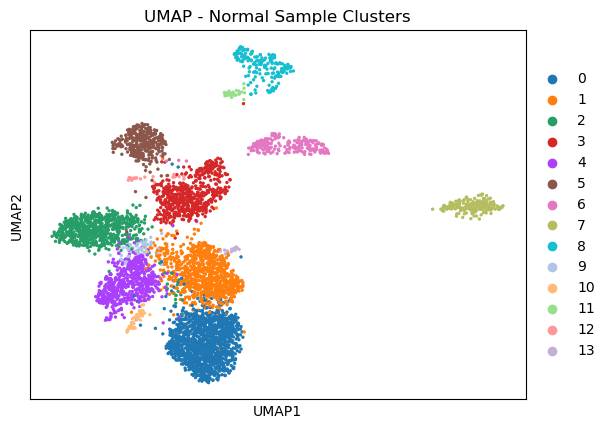

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


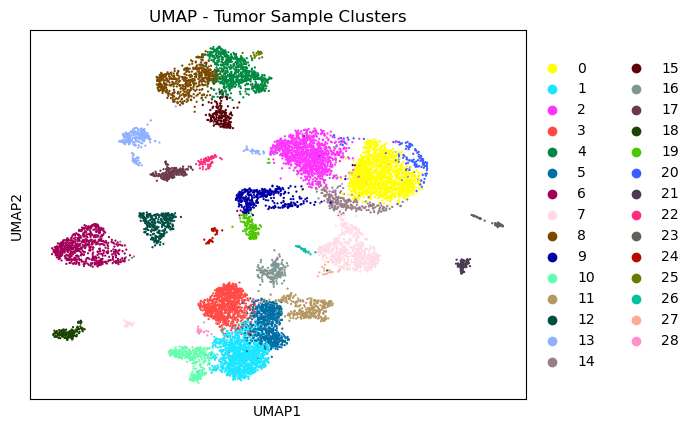

In [22]:
# Compute the neighborhood graph
sc.pp.neighbors(adata_normal, n_neighbors=10, n_pcs=30)
sc.pp.neighbors(adata_tumor, n_neighbors=10, n_pcs=30)

# Perform clustering using the Leiden algorithm
sc.tl.leiden(adata_normal, resolution=1.0)
sc.tl.leiden(adata_tumor, resolution=1.0)

# Visualize clusters
sc.pl.umap(adata_normal, color="leiden", title="UMAP - Normal Sample Clusters")
sc.pl.umap(adata_tumor, color="leiden", title="UMAP - Tumor Sample Clusters")


 Verify rank_genes_groups Exists
Check if rank_genes_groups results are stored correctly:

C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\MSI\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py

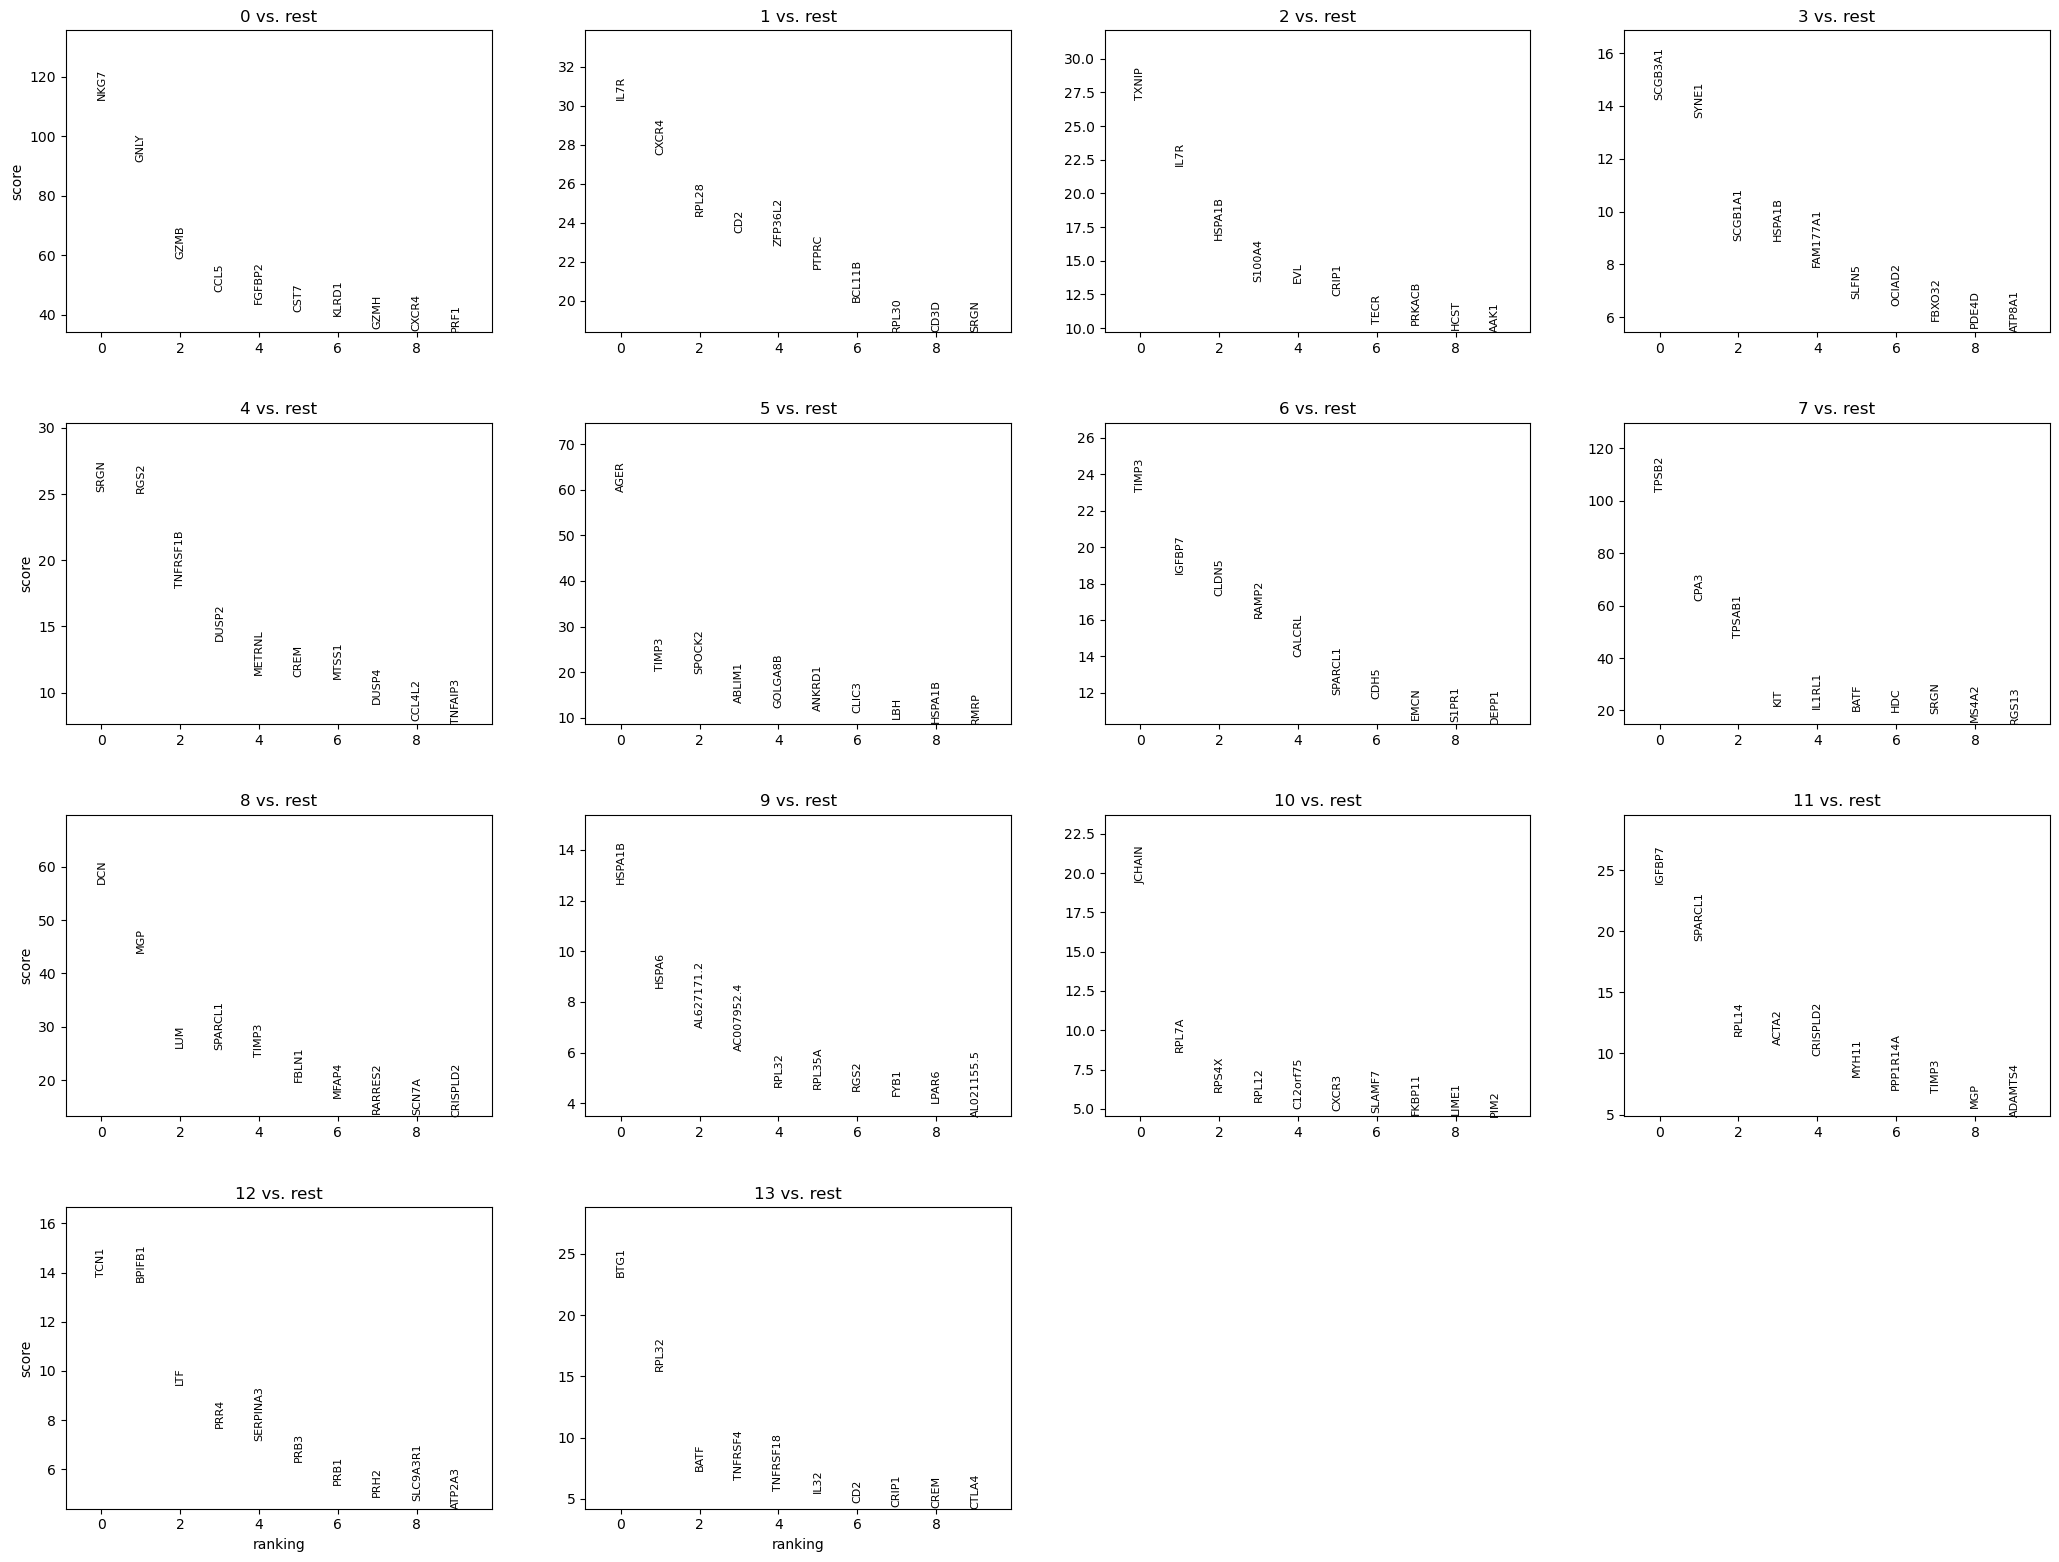

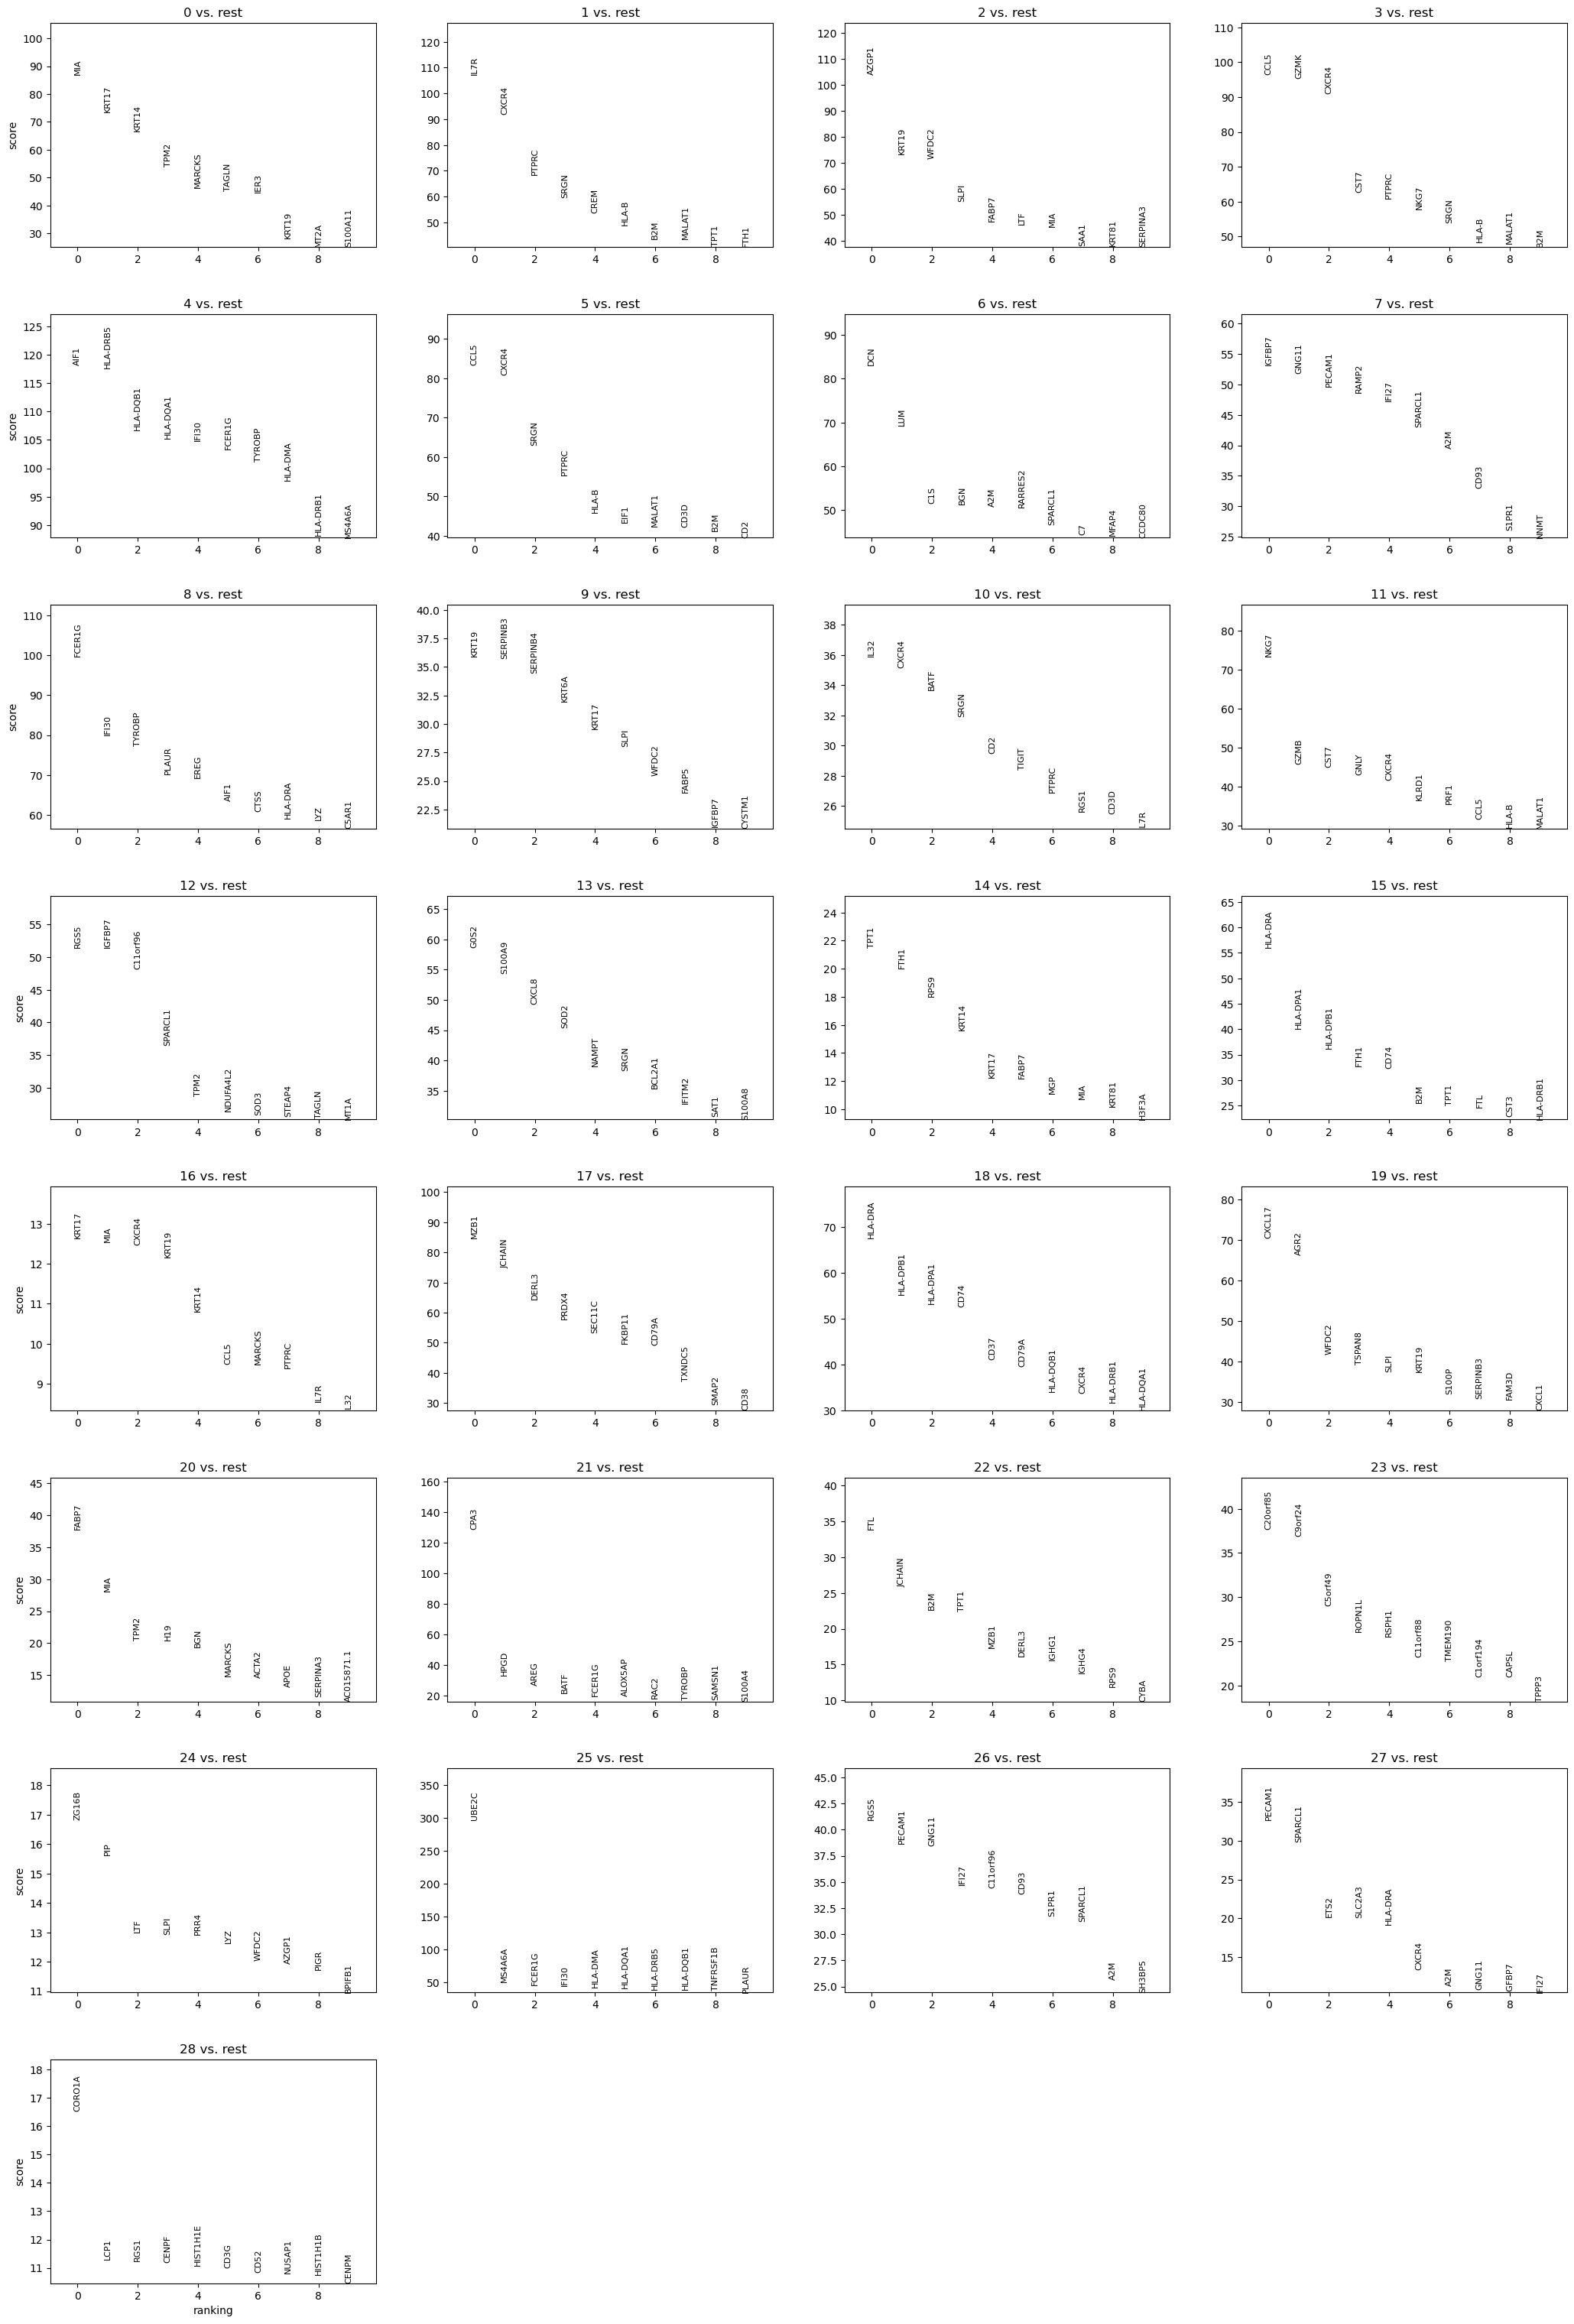

In [23]:
# Rank genes by group (cluster)
sc.tl.rank_genes_groups(adata_normal, groupby="leiden", method="t-test")
sc.tl.rank_genes_groups(adata_tumor, groupby="leiden", method="t-test")

# Plot top marker genes
sc.pl.rank_genes_groups(adata_normal, n_genes=10, sharey=False, title="Top Marker Genes - Normal Sample")
sc.pl.rank_genes_groups(adata_tumor, n_genes=10, sharey=False, title="Top Marker Genes - Tumor Sample")


2. Inspect rank_genes_groups
Ensure rank_genes_groups contains valid data:

In [25]:
print(adata_normal.uns.keys())  # Should include 'rank_genes_groups'
print(adata_tumor.uns.keys())  # Should include 'rank_genes_groups'

print(adata_normal.uns.get("rank_genes_groups", "No rank_genes_groups found"))
print(adata_tumor.uns.get("rank_genes_groups", "No rank_genes_groups found"))


odict_keys(['log1p', '_scvi_uuid', '_scvi_manager_uuid', 'hvg', 'pca', 'neighbors', 'leiden', 'leiden_colors', 'umap', 'rank_genes_groups'])
odict_keys(['log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'leiden_colors', 'umap', 'rank_genes_groups'])
{'params': {'groupby': 'leiden', 'reference': 'rest', 'method': 't-test', 'use_raw': False, 'layer': None, 'corr_method': 'benjamini-hochberg'}, 'names': rec.array([('NKG7', 'IL7R', 'TXNIP', 'SCGB3A1', 'SRGN', 'AGER', 'TIMP3', 'TPSB2', 'DCN', 'HSPA1B', 'JCHAIN', 'IGFBP7', 'TCN1', 'BTG1'),
           ('GNLY', 'CXCR4', 'IL7R', 'SYNE1', 'RGS2', 'TIMP3', 'IGFBP7', 'CPA3', 'MGP', 'HSPA6', 'RPL7A', 'SPARCL1', 'BPIFB1', 'RPL32'),
           ('GZMB', 'RPL28', 'HSPA1B', 'SCGB1A1', 'TNFRSF1B', 'SPOCK2', 'CLDN5', 'TPSAB1', 'LUM', 'AL627171.2', 'RPS4X', 'RPL14', 'LTF', 'BATF'),
           ...,
           ('IL7R', 'PTGDS', 'NKG7', 'HCST', 'GNLY', 'TGFB1', 'CORO1A', 'CCL5', 'CYTIP', 'CTSW', 'GZMA', 'IL7R', 'CCL4L2', 'IQGAP2'),
           ('TIMP3', 'TIMP3', '

3. Retrieve Top Genes


In [26]:
import pandas as pd

# Convert ranked genes to a DataFrame for inspection
df_normal = pd.DataFrame(adata_normal.uns["rank_genes_groups"]['names'])
df_tumor = pd.DataFrame(adata_tumor.uns["rank_genes_groups"]['names'])

print("Normal Sample - Top Genes DataFrame:")
print(df_normal)

print("Tumor Sample - Top Genes DataFrame:")
print(df_tumor)


Normal Sample - Top Genes DataFrame:
           0        1       2         3         4        5       6         7  \
0       NKG7     IL7R   TXNIP   SCGB3A1      SRGN     AGER   TIMP3     TPSB2   
1       GNLY    CXCR4    IL7R     SYNE1      RGS2    TIMP3  IGFBP7      CPA3   
2       GZMB    RPL28  HSPA1B   SCGB1A1  TNFRSF1B   SPOCK2   CLDN5    TPSAB1   
3       CCL5      CD2  S100A4    HSPA1B     DUSP2   ABLIM1   RAMP2       KIT   
4     FGFBP2  ZFP36L2     EVL  FAM177A1    METRNL  GOLGA8B  CALCRL    IL1RL1   
...      ...      ...     ...       ...       ...      ...     ...       ...   
1995     MGP     GNLY    GNLY    S100A4      NKG7     HCST    CST7    FGFBP2   
1996   DUSP4   IGFBP7    GZMB     CXCR4      ETS1     SRGN    NKG7  TNFRSF1B   
1997    IL7R    PTGDS    NKG7      HCST      GNLY    TGFB1  CORO1A      CCL5   
1998   TIMP3    TIMP3    CST7      SRGN      IL32     NKG7   PTPRC     CYTIP   
1999  HSPA1B   FGFBP2    CCL5     PTPRC      CCL5    PTPRC    CD3G      NKG7   

  

In [28]:
import pandas as pd

# Convert ranked genes to a DataFrame for better inspection
def get_top_genes(adata, sample_name):
    if "rank_genes_groups" in adata.uns:
        rank_genes = adata.uns["rank_genes_groups"]
        # Convert the result into a DataFrame
        top_genes_df = pd.DataFrame({
            group: rank_genes["names"][group]
            for group in rank_genes["names"].dtype.names
        })
        print(f"{sample_name} - Top Marker Genes (First 10):")
        print(top_genes_df.head(10))  # Display top 10 genes per cluster
    else:
        print(f"No marker genes found for {sample_name}.")

# Apply to normal and tumor samples
get_top_genes(adata_normal, "Normal Sample")
get_top_genes(adata_tumor, "Tumor Sample")



Normal Sample - Top Marker Genes (First 10):
        0        1       2         3         4        5        6       7  \
0    NKG7     IL7R   TXNIP   SCGB3A1      SRGN     AGER    TIMP3   TPSB2   
1    GNLY    CXCR4    IL7R     SYNE1      RGS2    TIMP3   IGFBP7    CPA3   
2    GZMB    RPL28  HSPA1B   SCGB1A1  TNFRSF1B   SPOCK2    CLDN5  TPSAB1   
3    CCL5      CD2  S100A4    HSPA1B     DUSP2   ABLIM1    RAMP2     KIT   
4  FGFBP2  ZFP36L2     EVL  FAM177A1    METRNL  GOLGA8B   CALCRL  IL1RL1   
5    CST7    PTPRC   CRIP1     SLFN5      CREM   ANKRD1  SPARCL1    BATF   
6   KLRD1   BCL11B    TECR    OCIAD2     MTSS1    CLIC3     CDH5     HDC   
7    GZMH    RPL30  PRKACB    FBXO32     DUSP4      LBH     EMCN    SRGN   
8   CXCR4     CD3D    HCST     PDE4D    CCL4L2   HSPA1B    S1PR1   MS4A2   
9    PRF1     SRGN    AAK1    ATP8A1   TNFAIP3     RMRP    DEPP1   RGS13   

          8           9        10        11        12        13  
0       DCN      HSPA1B    JCHAIN    IGFBP7      TCN

In [31]:
import pandas as pd

# Function to extract top genes based on log fold change
def get_top_effective_genes(adata, sample_name, top_n=3):
    if "rank_genes_groups" in adata.uns:
        rank_genes = adata.uns["rank_genes_groups"]
        
        # Dynamically retrieve cluster names
        cluster_names = rank_genes["names"].dtype.names
        
        # Process each cluster
        for cluster in cluster_names:
            # Create DataFrame for this cluster
            cluster_data = pd.DataFrame({
                "names": rank_genes["names"][cluster],
                "logfoldchanges": rank_genes["logfoldchanges"][cluster],
                "pvals": rank_genes["pvals"][cluster]
            })
            
            # Sort by log fold changes
            cluster_data = cluster_data.sort_values(by="logfoldchanges", ascending=False)
            
            # Print top genes
            print(f"{sample_name} - Cluster {cluster} - Top {top_n} Potent Genes:")
            print(cluster_data.head(top_n))
            print()
    else:
        print(f"No marker genes found for {sample_name}.")

# Apply the function to normal and tumor samples
get_top_effective_genes(adata_normal, "Normal Sample", top_n=3)
get_top_effective_genes(adata_tumor, "Tumor Sample", top_n=3)




Normal Sample - Cluster 0 - Top 3 Potent Genes:
           names  logfoldchanges     pvals
1413      SCARA5        7.146624  1.000000
1794     C9orf40        5.292534  0.017279
1526  AP000873.2        4.663249  0.908006

Normal Sample - Cluster 1 - Top 3 Potent Genes:
           names  logfoldchanges         pvals
1911       SVEP1        6.921299  5.165654e-09
1910     KIR2DL1        6.831972  5.165654e-09
1868  AC017104.1        6.561281  8.812257e-05

Normal Sample - Cluster 2 - Top 3 Potent Genes:
          names  logfoldchanges     pvals
1538  LINC00299        6.955665  0.000039
1523     ZNF683        6.825747  0.000131
957        PNMT        6.561298  1.000000

Normal Sample - Cluster 3 - Top 3 Potent Genes:
        names  logfoldchanges         pvals
1140   SEC31B        8.424648  1.490217e-01
1645   ZNF683        7.443810  3.933424e-10
540   DDN-AS1        7.377899  1.000000e+00

Normal Sample - Cluster 4 - Top 3 Potent Genes:
           names  logfoldchanges     pvals
621      

# select the gene with the highest log fold change score from your dataset for further analysis

In [32]:
import pandas as pd

def get_top_gene_by_logfoldchange(adata, sample_name):
    if "rank_genes_groups" in adata.uns:
        rank_genes = adata.uns["rank_genes_groups"]
        
        # Convert the result into a DataFrame with logfold changes and names
        logfoldchanges_df = pd.DataFrame({
            group: rank_genes["logfoldchanges"][group]
            for group in rank_genes["logfoldchanges"].dtype.names
        })
        
        # Get the gene with the highest absolute log fold change across all clusters
        top_gene = logfoldchanges_df.abs().max(axis=0).idxmax()  # Max absolute value index
        
        # Get the corresponding gene and its log fold change value
        top_gene_name = rank_genes["names"][top_gene][0]  # Gene with the highest log fold change
        top_gene_logfc = logfoldchanges_df[top_gene].max()  # The value of the log fold change
        
        print(f"{sample_name} - Top Target Gene based on Log Fold Change:")
        print(f"Gene: {top_gene_name}, Log Fold Change: {top_gene_logfc}")
        
    else:
        print(f"No marker genes found for {sample_name}.")

# Apply to normal and tumor samples
get_top_gene_by_logfoldchange(adata_normal, "Normal Sample")
get_top_gene_by_logfoldchange(adata_tumor, "Tumor Sample")


Normal Sample - Top Target Gene based on Log Fold Change:
Gene: IGFBP7, Log Fold Change: 15.6603422164917
Tumor Sample - Top Target Gene based on Log Fold Change:
Gene: PECAM1, Log Fold Change: 18.88309669494629
